# Chromosome ideograms

In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import geneinfo as gi
gi.email('your@email.com')

Bbox(x0=50000000.0, y0=2.299999999999997, x1=55969788.76009743, y1=4.042857509538209)


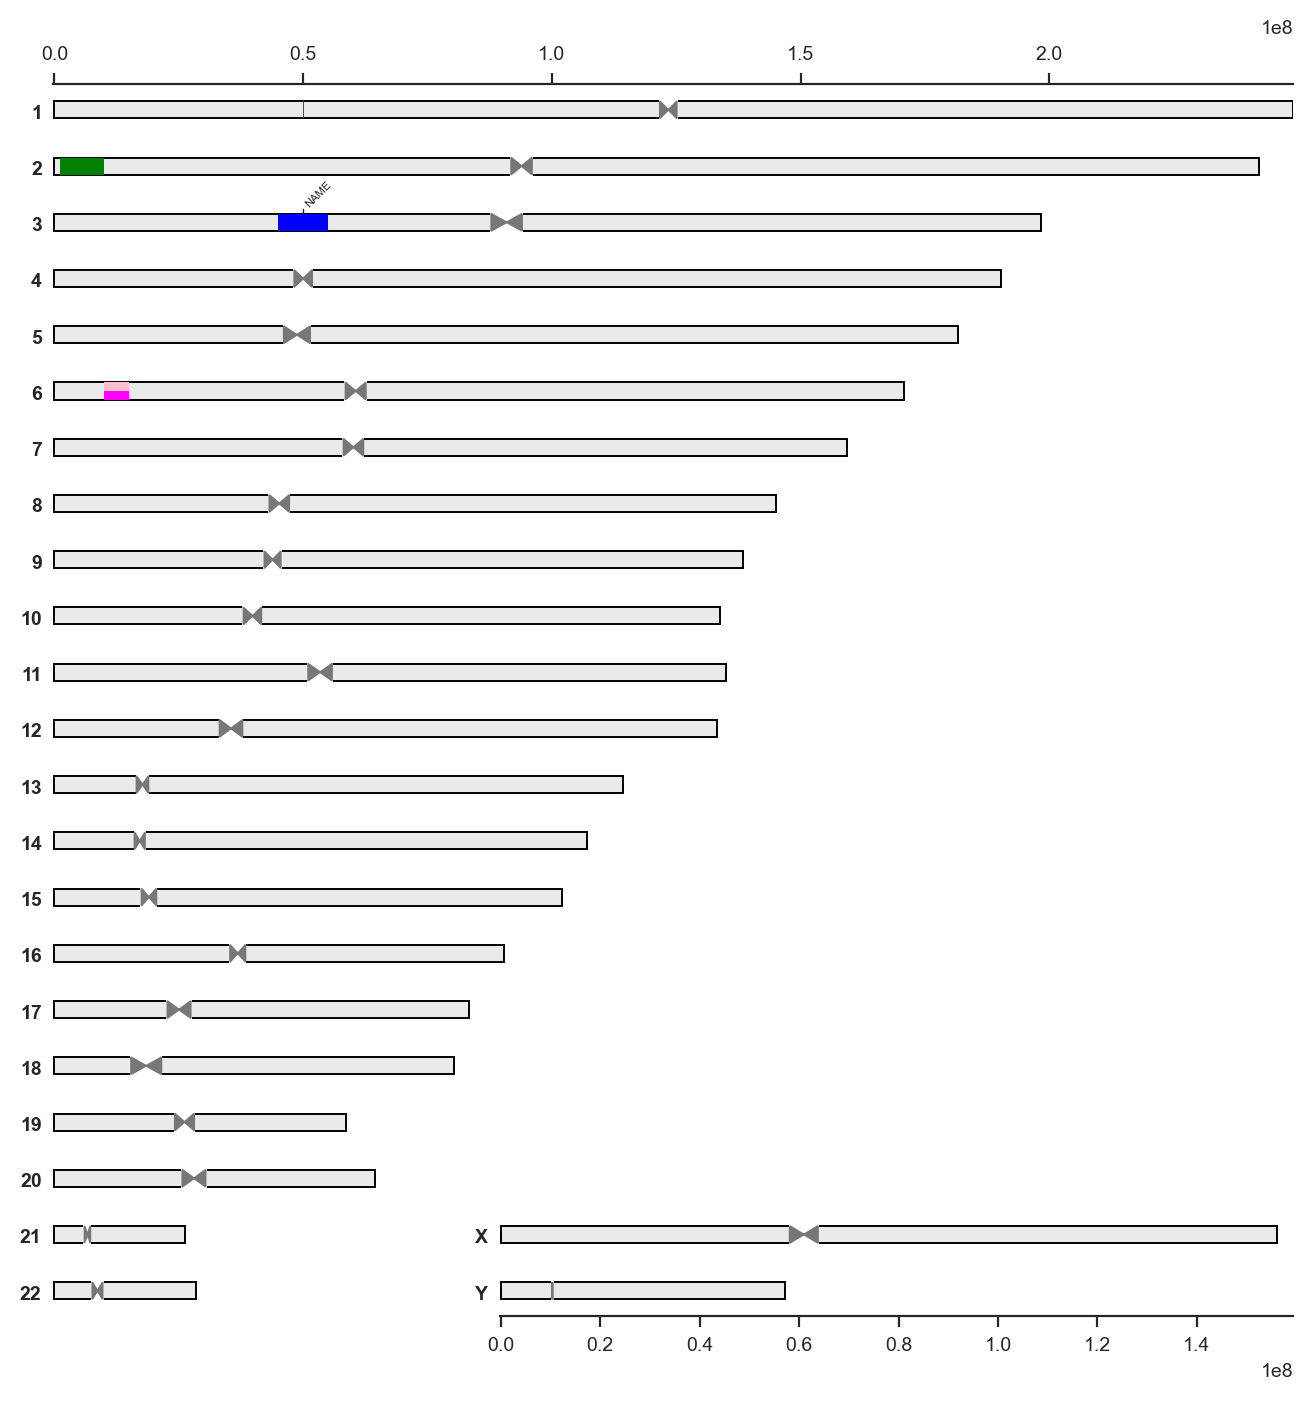

In [2]:
annotation = [
    ('chr1', 50000000, 50001000),                          # segment color defaults to red
    ('chr2', 10000000, 1000000, 'green'),                  # with segment color
    ('chr3', 45000000, 55000000, 'blue', 'NAME'),          # with name label
    ('chr6', 10000000, 15000000, 'magenta', None, 0, 0.5), # with base and height
    ('chr6', 10000000, 15000000, 'pink', None, 0.5, 0.5),  # with base and height
]

gi.chrom_ideogram(annotation, figsize=(8, 8))

To make sure segments are visible on the plot, the default minimal size of plotteed segments are 200000. This can be changed like this (notice how the chr1 segment is no longer visible):

Bbox(x0=50000000.0, y0=2.299999999999997, x1=55969788.76009743, y1=3.8909902576697277)


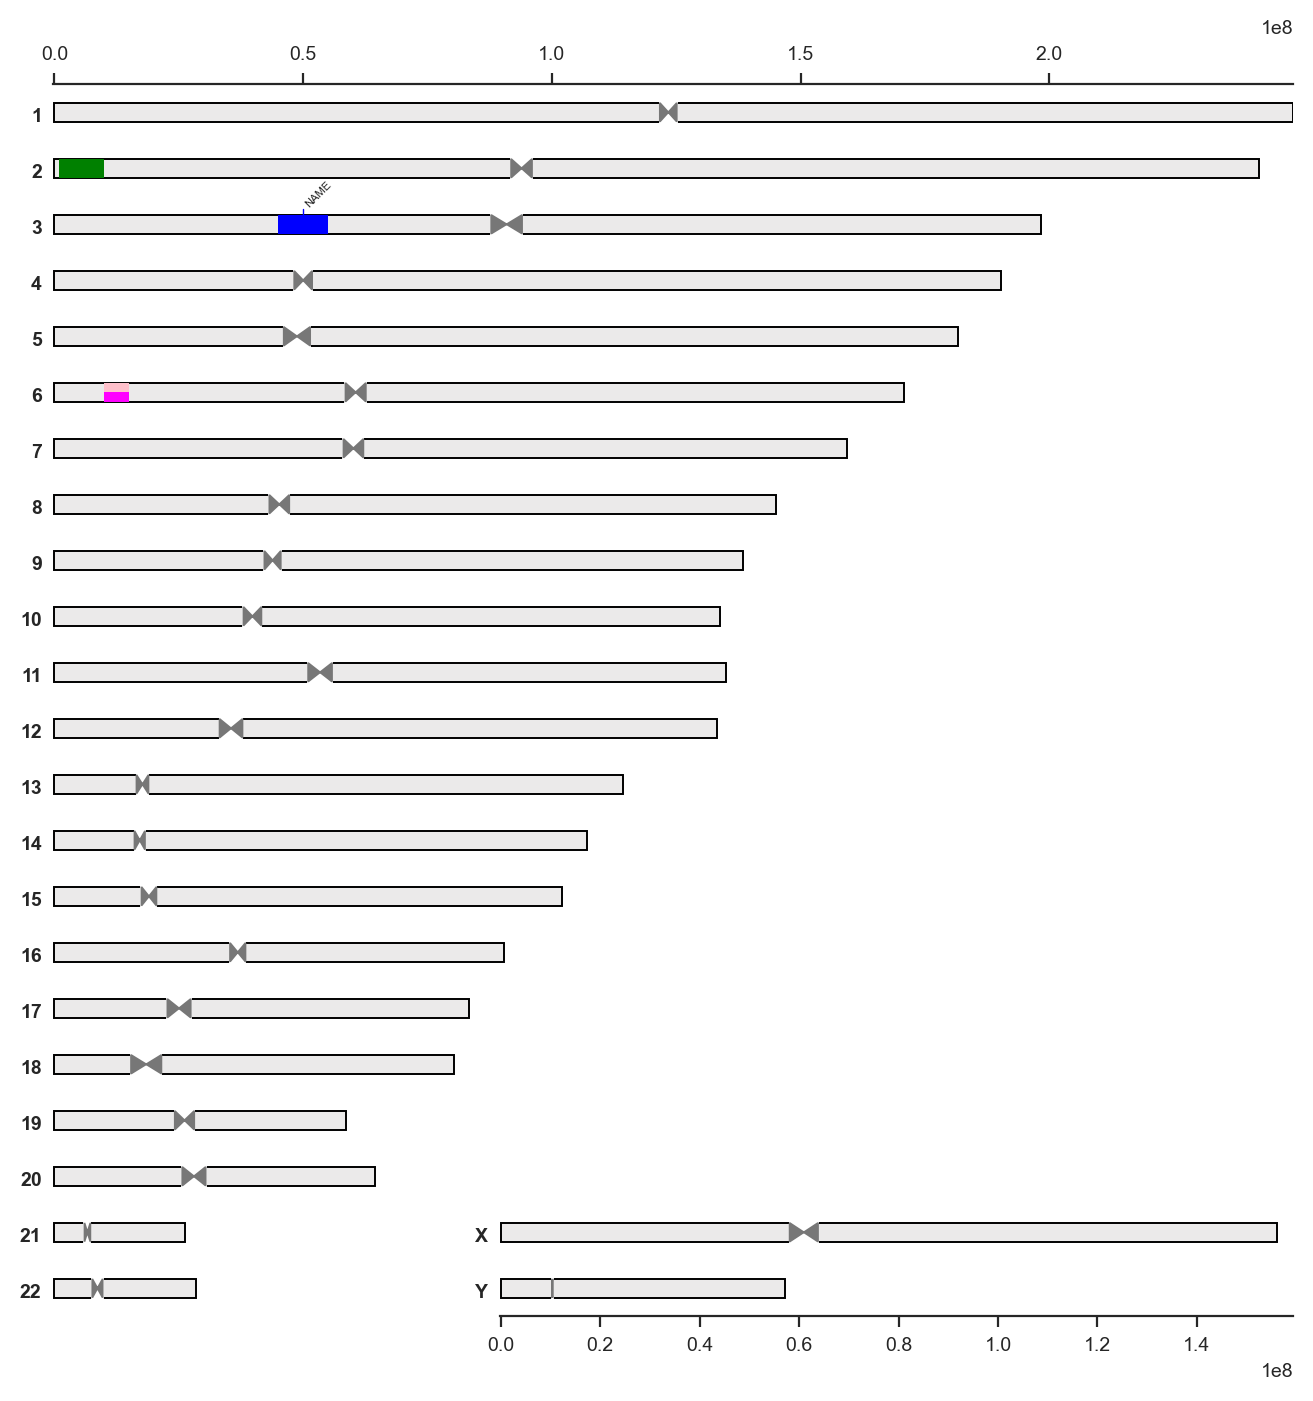

In [3]:
gi.chrom_ideogram(annotation, figsize=(8, 8), min_visible_width=1, hspace=0)

Other assembly, figure dimentions:

Bbox(x0=49999999.99999999, y0=2.299999999999997, x1=55976834.941172086, y1=4.042857509538209)


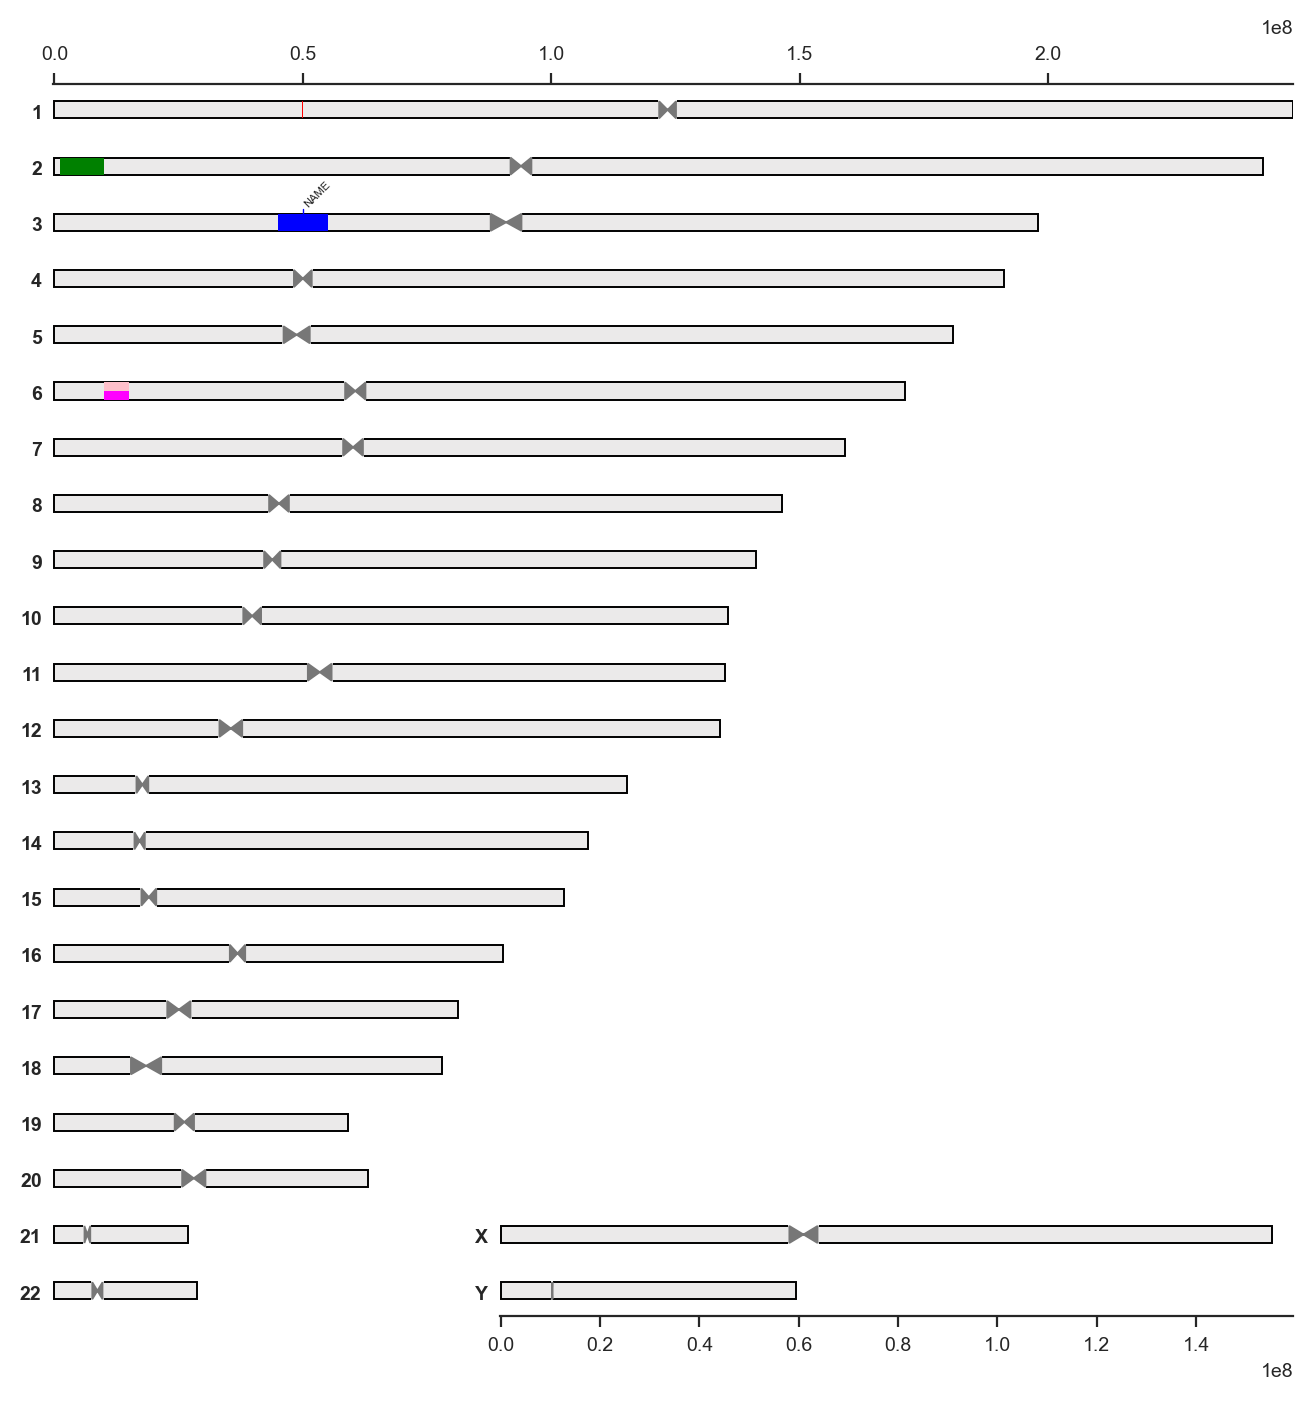

In [4]:
gi.chrom_ideogram(annotation, assembly='hg19', figsize=(8, 8))

**You can add position markers along a chromosome like this to better see the location of some segments:**

Bbox(x0=50000000.0, y0=2.299999999999997, x1=55969788.76009743, y1=4.042857509538209)
Bbox(x0=100000000.5, y0=2.299999999999997, x1=104512876.5269784, y1=3.6175172839961505)
Bbox(x0=110000000.5, y0=2.299999999999997, x1=114406273.15626237, y1=3.586394828468684)
Bbox(x0=120000000.5, y0=2.299999999999997, x1=124512876.5269784, y1=3.6175172839961505)
Bbox(x0=130000000.5, y0=2.299999999999997, x1=134512876.5269784, y1=3.6175172839961505)
Bbox(x0=140000000.5, y0=2.299999999999997, x1=144512876.5269784, y1=3.6175172839961505)
Bbox(x0=150000000.5, y0=2.299999999999997, x1=154512876.52697843, y1=3.6175172839961505)
Bbox(x0=160000000.5, y0=2.299999999999997, x1=164512876.52697843, y1=3.6175172839961505)
Bbox(x0=170000000.5, y0=2.299999999999997, x1=174512876.5269784, y1=3.6175172839961505)
Bbox(x0=180000000.5, y0=2.299999999999997, x1=184512876.5269784, y1=3.6175172839961505)
Bbox(x0=190000000.5, y0=2.299999999999997, x1=194512876.5269784, y1=3.6175172839961505)


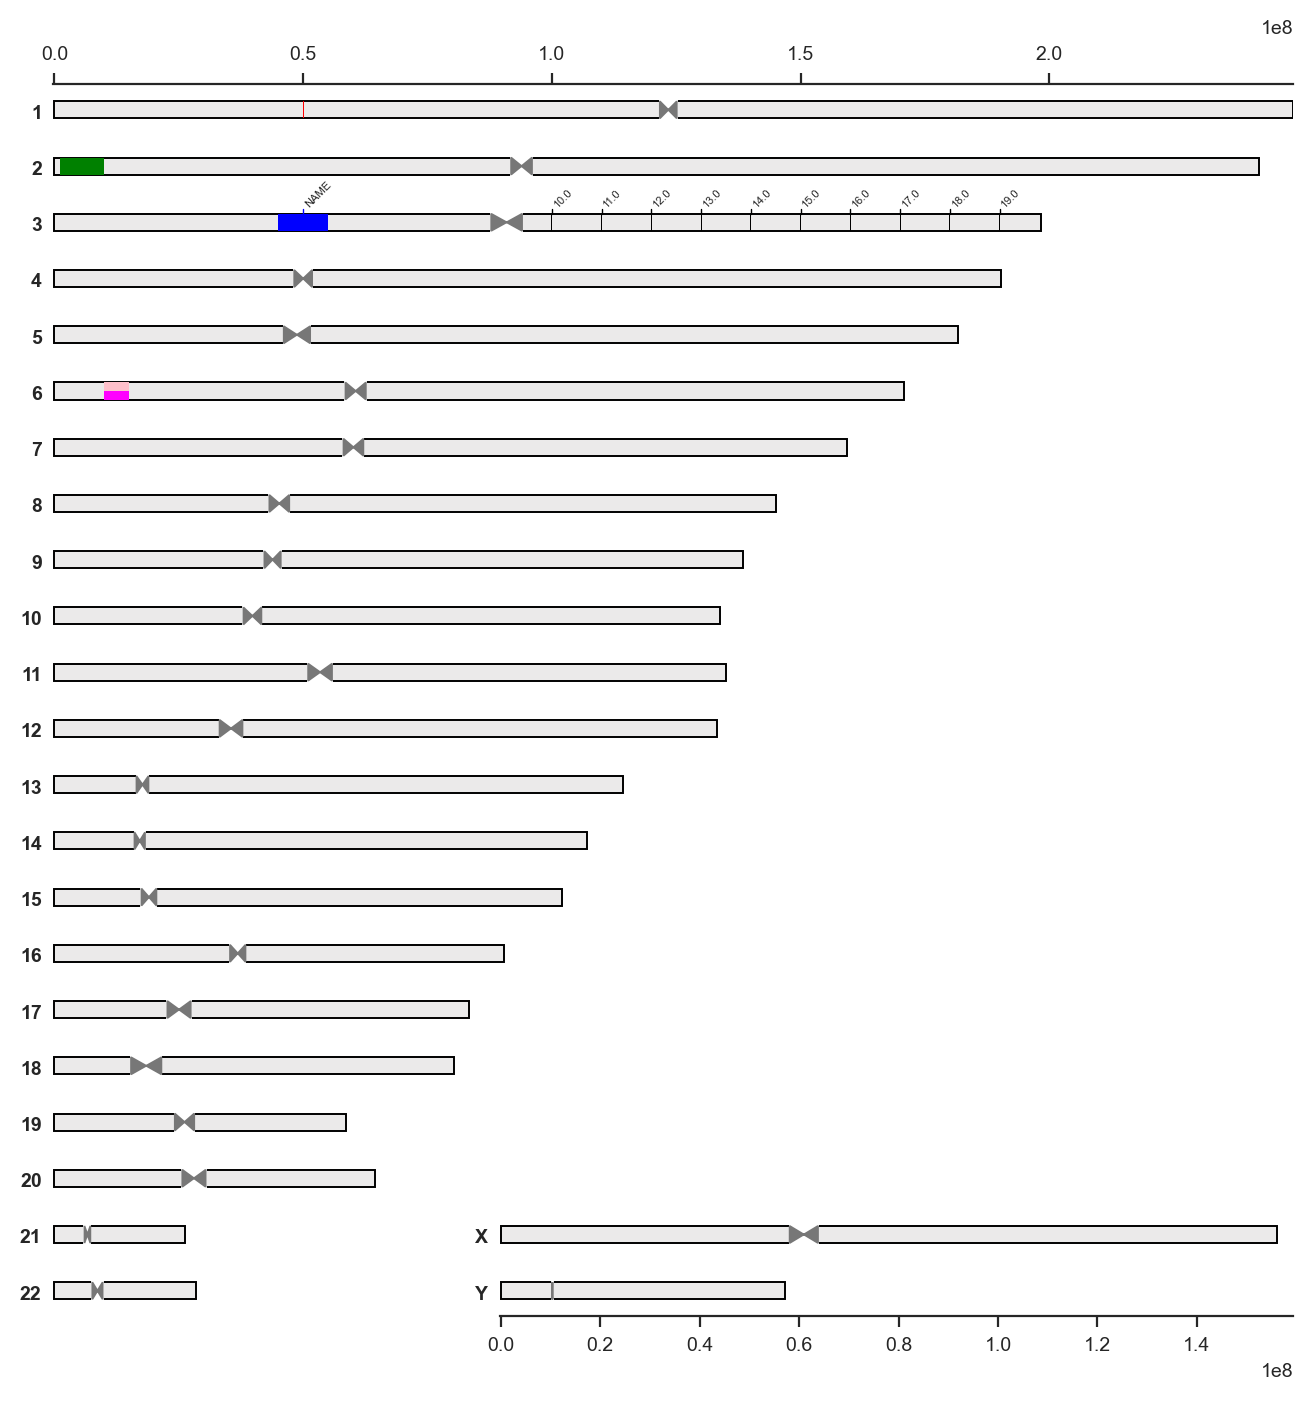

In [5]:
chrom = 'chr3'
start = 100000000
end = 200000000
width = 10000000
annotation2 = annotation + [(chrom, x[0], x[1], 'black', str(x[2]/width)) for x in zip(
    range(start, end, width), 
    range(start+1, end, width), 
    range(start, end, width)
)]
gi.chrom_ideogram(annotation2, figsize=(8, 8))

In [6]:
lists = gi.GoogleSheet()

In [7]:
import importlib
import geneinfo
importlib.reload(geneinfo)

coords = gi.gene_coord(lists.get('xi_escape'), assembly='GRCh38')
annotation = [(c, s, e, 'red', g) for g, (c, s, e, _) in coords.items()]

In [8]:
coords = gi.gene_coord(['ATRX', 'MAGT1'], assembly='GRCh38')
annotation = [(c, s, e, 'red', g) for g, (c, s, e, _) in coords.items()]

In [9]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Polygon:
    def __init__(self, points):
        self.points = points

    def get_points(self):
        return self.points

    def nudge_y(self, nudge):
        for point in self.points:
            point.y += nudge

def is_polygons_intersecting(a, b):
    for x in range(2):
        polygon = a if x == 0 else b

        for i1 in range(len(polygon.get_points())):
            i2 = (i1 + 1) % len(polygon.get_points())
            p1 = polygon.get_points()[i1]
            p2 = polygon.get_points()[i2]

            normal = Point(p2.y - p1.y, p1.x - p2.x)

            min_a = float('inf')
            max_a = float('-inf')

            for p in a.get_points():
                projected = normal.x * p.x + normal.y * p.y
                min_a = min(min_a, projected)
                max_a = max(max_a, projected)

            min_b = float('inf')
            max_b = float('-inf')

            for p in b.get_points():
                projected = normal.x * p.x + normal.y * p.y
                min_b = min(min_b, projected)
                max_b = max(max_b, projected)

            if max_a < min_b or max_b < min_a:
                return False

    return True

a = list(zip([0, 0, 2, 2], [0, 2, 2, 0]))
b = list(zip([1, 1, 3, 3], [1, 3, 3, 1]))

is_polygons_intersecting(
    Polygon([Point(*tup) for tup in a]),
    Polygon([Point(*tup) for tup in b])
)

True

In [10]:
import pandas as pd
import math
from matplotlib.artist import Artist
from operator import sub


axes_height_inches = 0.8
aspect = 0.1
axes_width_inches = axes_height_inches / aspect
max_chrom_size = 1e5
axes_height = aspect * max_chrom_size
fig_height = axes_height_inches * nr_rows
fig_width = fig_height / nr_rows / aspect 

# axes_height = 1e4 # relative to length of chrom one
# max_chrom_size = 1e5
# aspect = axes_height / max_chrom_size
# fig_width = 8
# axes_height_inches = fig_width_inches * aspect
# fig_height = axes_height_inches * nr_rows

print(axes_height, aspect, axes_height_inches, fig_width, fig_height)

point_size = 1/72

nr_rows = 11
fig, axes = plt.subplots(nr_rows, 1, figsize=(fig_width, fig_width*aspect*nr_rows), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0)
ax = axes[0]

xlim = (0, max_chrom_size)
ylim = (0, 1)
scaled_y_lim = xlim[0] * aspect, xlim[1] * aspect
ax.set_xlim(xlim)
ax.set_ylim(scaled_y_lim)
plt.yticks([])
y_unit = -sub(*scaled_y_lim) / -sub(*ylim)

rel_font_height = 0.07
font_size = rel_font_height * axes_height_inches / point_size


def draw_text(x_pos, y_pos, text, font_size, ax, y_line_bottom=0):

    # y_unit = -sub(*scaled_y_lim(ax) / -sub(*self.ylim)
    
    t = ax.text(x_pos, y_pos, text, fontsize=font_size, 
                horizontalalignment='left',
                verticalalignment='bottom', 
                rotation=45, zorder=3, 
                bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'))
    ax.plot((x_pos, x_pos, x_pos+y_unit/40),
            (y_line_bottom, y_pos, y_pos+y_unit/40), 
            linewidth=0.5, color='darkgray', zorder=2)


def get_polygon(text:str, x_pos:int, y_pos:float, ax:matplotlib.axes.Axes) -> Polygon:

    # y_unit = -sub(*scaled_y_lim(ax) / -sub(*self.ylim)

    y_pos = y_pos * y_unit
    
    t = ax.text(x_pos, y_pos, text, fontsize=font_size, 
                horizontalalignment='left',
                verticalalignment='bottom', 
                rotation=0, zorder=3, 
                # bbox=dict(boxstyle='square,pad=0', 
                bbox=dict(boxstyle='square', 
                          fc='none', ec='none', alpha=0.4))
    
    transf = ax.transData.inverted()
    bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
    bbt = bb.transformed(transf)
    coords = bbt.get_points()
    
    Artist.remove(t)
    
    (x0, y0), (x1, y1) = coords
    pad = (y1 - y0)/5
    coords = np.array([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])
        
    x, y = zip(*coords)
    df = pd.DataFrame(dict(x=x, y=y))
    df['y'] -= y_pos
    df['x'] -= x_pos
    dfx = df['x']*math.cos(math.radians(45))-df['y']*math.sin(math.radians(45))
    df['y'] = df['x']*math.sin(math.radians(45))+df['y']*math.cos(math.radians(45))
    df['x'] = dfx
    df['y'] += y_pos
    df['x'] += x_pos
        
    coords = np.array(list(zip(df.x, df.y)))
    
    x_pos, y_pos = df['x'][0] - (df['x'][0] - df['x'][1]), df['y'][0]

    df['x'] = df.x + np.array([-pad, -pad, pad, pad])
    df['y'] = df.y + np.array([-pad, pad, pad, -pad])
    
    return x_pos, y_pos, Polygon([Point(x, y) for x, y in zip(df.x, df.y)])



# annot = [(x, 'AKAP4') for x in range(1, int(max_chrom_size), int(max_chrom_size/100))]

import random
_names = random.choices(['AKAP4', 'DYNLT3', 'MAGEA4', 'TP53'], k=100)
_pos = np.random.randint(1, max_chrom_size, 100).tolist()
annot = list(zip(_pos, _names))
#annot = [(x, 'AKAP4') for x in np.random.randint(1, max_chrom_size, 100).tolist()]

annot = sorted(annot, reverse=True)

for ax in axes:
    # y_unit = -sub(*scaled_y_lim(ax) / -sub(*self.ylim)

    polybuff = []
    for pos, name in annot:
        x, y, poly = get_polygon(name, pos, 0.1, ax)

        while any(is_polygons_intersecting(poly, p) for p in polybuff):
            nudge = 0.1 * y_unit
            y += nudge
            poly.nudge_y(nudge)
        draw_text(x, y, name, font_size, ax)

        if len(polybuff) > 5:
            del polybuff[0]
        polybuff.append(poly)

    z = 10
    for i, t in enumerate(reversed(ax.texts)):
        t.set_zorder(z+i)


NameError: name 'nr_rows' is not defined

In [54]:
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.artist import Artist
from operator import sub
import random
import numpy as np
from collections import defaultdict
from itertools import cycle

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Polygon:
    def __init__(self, points):
        self.points = points

    def get_points(self):
        return self.points

    def nudge_y(self, nudge):
        for point in self.points:
            point.y += nudge
            
class GenomeIdeogram(object):

    d = {'axes.linewidth': 0.8, 'grid.linewidth': 0.64, 'lines.linewidth': 0.96, 
         'lines.markersize': 3.84, 'patch.linewidth': 0.64, 'xtick.major.width': 0.8,
         'ytick.major.width': 0.8, 'xtick.minor.width': 0.64, 'ytick.minor.width': 0.64,
         'xtick.major.size': 3.84, 'ytick.major.size': 3.84, 'xtick.minor.size': 2.56, 
         'ytick.minor.size': 2.56, 'font.size': 7.68, 'axes.labelsize': 7.68,
         'axes.titlesize': 7.68, 'xtick.labelsize': 7.04, 'ytick.labelsize': 7.04, 
         'legend.fontsize': 7.04, 'legend.title_fontsize': 7.68}
    
    chrom_lengths = {'hg19': {'chr1': 249250621, 'chr2': 243199373, 'chr3': 198022430, 'chr4': 191154276, 
                              'chr5': 180915260, 'chr6': 171115067, 'chr7': 159138663, 'chr8': 146364022, 
                              'chr9': 141213431, 'chr10': 135534747, 'chr11': 135006516, 'chr12': 133851895,
                              'chr13': 115169878, 'chr14': 107349540, 'chr15': 102531392, 'chr16': 90354753, 
                              'chr17': 81195210, 'chr18': 78077248, 'chr19': 59128983, 'chr20': 63025520, 
                              'chr21': 48129895, 'chr22': 51304566, 'chrX': 155270560, 'chrY': 59373566},
                     'hg38': {'chr1': 248956422, 'chr2': 242193529, 'chr3': 198295559, 'chr4': 190214555, 
                              'chr5': 181538259, 'chr6': 170805979, 'chr7': 159345973, 'chr8': 145138636, 
                              'chr9': 138394717, 'chr10': 133797422, 'chr11': 135086622, 'chr12': 133275309, 
                              'chr13': 114364328, 'chr14': 107043718, 'chr15': 101991189, 'chr16': 90338345, 
                              'chr17': 83257441, 'chr18': 80373285, 'chr19': 58617616, 'chr20': 64444167, 
                              'chr21': 46709983, 'chr22': 50818468, 'chrX': 156040895, 'chrY': 57227415}}    

    # TODO: make the centromeres fit each assembly!
    centromeres = {
        'chr1':    (121700000, 125100000),
        'chr10':   (38000000, 41600000),
        'chr11':   (51000000, 55800000),
        'chr12':   (33200000, 37800000),
        'chr13':   (16500000, 18900000),
        'chr14':   (16100000, 18200000),
        'chr15':   (17500000, 20500000),
        'chr16':   (35300000, 38400000),
        'chr17':   (22700000, 27400000),
        'chr18':   (15400000, 21500000),
        'chr19':   (24200000, 28100000),
        'chr2':    (91800000, 96000000),
        'chr20':   (25700000, 30400000),
        'chr21':   (10900000, 13000000),
        'chr22':   (13700000, 17400000),
        'chr3':    (87800000, 94000000),
        'chr4':    (48200000, 51800000),
        'chr5':    (46100000, 51400000),
        'chr6':    (58500000, 62600000),
        'chr7':    (58100000, 62100000),
        'chr8':    (43200000, 47200000),
        'chr9':    (42200000, 45500000),
        'chrX':    (58100000, 63800000),
        'chrY':    (10300000, 10400000)}                     

    
    def __init__(self, axes_height_inches=1, axes_width_inches=12, hspace=0, ylim=(0, 1), 
                 rel_font_height=0.05, assembly:str='hg38'):
        
        self.chr_names = [f'chr{x}' for x in list(range(1, 23))+['X', 'Y']]
        self.chr_sizes = [self.chrom_lengths[assembly][chrom] for chrom in self.chr_names]
        self.max_chrom_size = max(self.chr_sizes)
        nr_rows = len(self.chr_names) - 1
        self.aspect = axes_height_inches / axes_width_inches
        axes_width = self.max_chrom_size
        axes_height = self.aspect * self.max_chrom_size
        fig_height_inches = axes_height_inches * (nr_rows-1) + hspace * (nr_rows-1)
        fig_width_inches = axes_width_inches #fig_height_inches / (nr_rows-1) / aspect 
        figsize = (fig_width_inches, fig_height_inches)
        point_size = 1/72
        self.ylim = ylim
        self.font_size = rel_font_height * axes_height_inches / point_size

        self.fig = plt.figure(figsize=figsize)
        plt.subplots_adjust(hspace=0)
        
        with plt.rc_context(self.d):
        
            nr_rows, nr_cols = len(self.chr_names)-2+1, 2
    
            # fig = plt.figure(figsize=figsize)

            end_padding = 300000
            
            # gs = matplotlib.gridspec.GridSpec(nr_rows, 25)
            gs = matplotlib.gridspec.GridSpec(nr_rows+1, 25, height_ratios=[1e-2]+[1]*nr_rows)
            gs.update(wspace=0, hspace=hspace) 

            dummy_ax = plt.subplot(gs[0, :])
            xlim = (-end_padding, self.max_chrom_size+end_padding)
            dummy_ax.set_xlim(xlim)
            # dummy_ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

            dummy_ax.spines['top'].set_visible(True)
            dummy_ax.xaxis.tick_top()
            dummy_ax.xaxis.set_label_position('top') 
            dummy_ax.yaxis.set_ticks_position('none')
            dummy_ax.set_yticklabels([])
        
            ax_list = [plt.subplot(gs[i, :]) for i in range(1, nr_rows-2)]
            ax_list.append(plt.subplot(gs[nr_rows-2, :9]))
            ax_list.append(plt.subplot(gs[nr_rows-1, :9]))
            ax_list.append(plt.subplot(gs[nr_rows-2, 9:]))
            ax_list.append(plt.subplot(gs[nr_rows-1, 9:]))

            self.ax_list = ax_list
            self.chr_axes = dict(zip(self.chr_names, self.ax_list))
    
            for ax in self.ax_list[:-4]:
                xlim = (-end_padding, self.max_chrom_size+end_padding)
                scaled_y_lim = xlim[0] * self.aspect, xlim[1] * self.aspect
                ax.set_xlim(xlim)
                ax.set_ylim(scaled_y_lim)
            for ax in ax_list[-4:]:
                xlim = (-end_padding, ((25-9)/25)*self.max_chrom_size+end_padding)
                scaled_y_lim = xlim[0] * self.aspect, xlim[1] * self.aspect
                ax.set_xlim(xlim)
                ax.set_ylim(scaled_y_lim)
    
            for i in range(len(self.ax_list)):
                chrom = self.chr_names[i]
                ax = ax_list[i]
                
                start, end = 0, self.chr_sizes[i]
                ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

                # ax.spines['top'].set_visible(False)
                # ax.spines['right'].set_visible(False)
                # ax.spines['bottom'].set_visible(False)
                # ax.spines['left'].set_visible(False)
                # ax.set_ylim((0, 3))
                # ax.set_ylim((0, 5))
    
                if i in [20, 21]:   
                    x = -3500000 * 10 / figsize[1]
                else:
                    x = -2000000 * 10 / figsize[1]

                ax.text(x, self.map_y(-sub(*self.ylim), ax)/2, chrom.replace('chr', ''), fontsize=7, verticalalignment='center', horizontalalignment='right', weight='bold')
    
                # h = ax.set_ylabel(chrom)
                # h.set_rotation(0)
                ax.set_yticklabels([])
    
                # if i == 0:
                #     ax.spines['top'].set_visible(True)
                #     ax.xaxis.tick_top()
                #     ax.xaxis.set_label_position('top') 
                #     ax.yaxis.set_ticks_position('none')
                # elif i == len(ax_list)-1:
                if i == len(self.ax_list)-1:
                    ax.xaxis.tick_bottom()
                    ax.spines['bottom'].set_visible(True)                    
                    ax.yaxis.set_ticks_position('none')
                    ax.yaxis.set_visible(False)
                    ax.set_yticklabels([])
                else:
                    ax.set_xticklabels([])
                    ax.xaxis.set_ticks_position('none')
                    ax.yaxis.set_ticks_position('none')
                    # ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

    def draw_chromosomes(self, base=0.05, height=0.25, facecolor='#EBEAEA', edgecolor='black', linewidth=0.7, **kwargs):

        with plt.rc_context(self.d):

            for i in range(len(self.ax_list)):
                chrom = self.chr_names[i]
                ax = self.ax_list[i]
                start, end = 0, self.chr_sizes[i]                

                ideogram_base = self.map_y(base, ax)
                ideogram_height = self.map_y(height, ax)
                
                # draw chrom
                g = ax.add_patch(patches.Rectangle((start, ideogram_base), end-start, ideogram_height, 
                                           # fill=False,
                                           facecolor=facecolor,
                                           edgecolor=edgecolor,
                                           zorder=0,
                                           linewidth=linewidth,
                                           **kwargs
                                          ))
                # g = ax.add_patch(patches.Rectangle((start, ideogram_base), end-start, ideogram_height, 
                #                            # fill=False,
                #                            facecolor='black',
                #                            edgecolor=None,
                #                            # zorder=1, 
                #                           ))
                # g = ax.add_patch(patches.Rectangle((start+self.map_y(0.01, ax), ideogram_base+self.map_y(0.01, ax)), (end-start)-self.map_y(2*0.01, ax), ideogram_height-self.map_y(2*.01, ax), 
                #                            # fill=False,
                #                            facecolor='#EBEAEA',
                #                            edgecolor=None,
                #                            # zorder=1, 
                #                           ))                
    
                # draw centromere
                cent_start, cent_end = self.centromeres[chrom]
                ymin, ymax = ax.get_ylim()
                ax.add_patch(patches.Rectangle((cent_start, ymin), cent_end-cent_start, ymax, 
                                           fill=True, color='white',
                                           zorder=1))
                xy = [[cent_start, ideogram_base], [cent_start, ideogram_base+ideogram_height], [cent_end, ideogram_base], [cent_end, ideogram_base+ideogram_height]]
                g = ax.add_patch(patches.Polygon(xy, closed=True, zorder=2, fill=True,
                                         # color='#666666',
                                         color='#777777',
                                        ))


    def is_polygons_intersecting(self, a, b):
        for x in range(2):
            polygon = a if x == 0 else b
    
            for i1 in range(len(polygon.get_points())):
                i2 = (i1 + 1) % len(polygon.get_points())
                p1 = polygon.get_points()[i1]
                p2 = polygon.get_points()[i2]
    
                normal = Point(p2.y - p1.y, p1.x - p2.x)
    
                min_a = float('inf')
                max_a = float('-inf')
    
                for p in a.get_points():
                    projected = normal.x * p.x + normal.y * p.y
                    min_a = min(min_a, projected)
                    max_a = max(max_a, projected)
    
                min_b = float('inf')
                max_b = float('-inf')
    
                for p in b.get_points():
                    projected = normal.x * p.x + normal.y * p.y
                    min_b = min(min_b, projected)
                    max_b = max(max_b, projected)
    
                if max_a < min_b or max_b < min_a:
                    return False
    
        return True

    
    def scaled_y_lim(self, ax):
        # xlim = (0, max_chrom_size)
        xlim = ax.get_xlim()
        return xlim[0] * self.aspect, xlim[1] * self.aspect
    

    def map_y(self, y, ax, bottom=0, top=1):
        miny, maxy = ax.get_ylim()

        return y * (top - bottom) * (maxy - miny) / (self.ylim[1] - self.ylim[0]) + bottom * (maxy - miny)
        # zero = -miny
        # if y >= 0:
        #     return y * (top - max(bottom, zero)) * (maxy - zero) / (self.ylim[1] - self.ylim[0]) + max(bottom, zero) * (maxy - zero)
        # else:
        #     return y * (min(top, zero) - bottom) * (zero - miny) / (self.ylim[1] - self.ylim[0]) + min(top, zero) * (zero - miny)

        

    
    def draw_text(self, x_pos, y_pos, text, ax, color='black', y_line_bottom=0):
        y_unit = -sub(*self.scaled_y_lim(ax)) / -sub(*self.ylim)
        
        t = ax.text(x_pos, y_pos, text, fontsize=self.font_size, 
                    color=color,
                    horizontalalignment='left',
                    verticalalignment='bottom', 
                    rotation=45, zorder=3, 
                    bbox=dict(boxstyle='square,pad=0', 
                              fc='none', 
                              # fc=color, alpha=0.4,
                              ec='none'))
        ax.plot((x_pos, x_pos, x_pos+y_unit/40),
                (y_line_bottom, y_pos, y_pos+y_unit/40), 
                linewidth=0.5, 
                # color='darkgray', 
                color=color,
                alpha=0.3,
                zorder=2)
    
    
    def get_polygon(self, text:str, x_pos:int, y_pos:float, ax:matplotlib.axes.Axes) -> Polygon:
    
        y_unit = -sub(*self.scaled_y_lim(ax)) / -sub(*self.ylim)
    
        y_pos = y_pos * y_unit
        
        t = ax.text(x_pos, y_pos, text, fontsize=self.font_size,
                    horizontalalignment='left',
                    verticalalignment='bottom', 
                    rotation=0, zorder=3, 
                    # bbox=dict(boxstyle='square,pad=0', 
                    bbox=dict(boxstyle='square', 
                              fc='none', ec='none', alpha=0.4))
        
        transf = ax.transData.inverted()
        bb = t.get_window_extent(renderer = self.fig.canvas.get_renderer())
        bbt = bb.transformed(transf)
        coords = bbt.get_points()
        
        Artist.remove(t)
        
        (x0, y0), (x1, y1) = coords
        pad = (y1 - y0)/5
        coords = np.array([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])
            
        x, y = zip(*coords)
        df = pd.DataFrame(dict(x=x, y=y))
        df['y'] -= y_pos
        df['x'] -= x_pos
        dfx = df['x']*math.cos(math.radians(45))-df['y']*math.sin(math.radians(45))
        df['y'] = df['x']*math.sin(math.radians(45))+df['y']*math.cos(math.radians(45))
        df['x'] = dfx
        df['y'] += y_pos
        df['x'] += x_pos
            
        coords = np.array(list(zip(df.x, df.y)))
        
        x_pos, y_pos = df['x'][0] - (df['x'][0] - df['x'][1]), df['y'][0]
    
        df['x'] = df.x + np.array([-pad, -pad, pad, pad])
        df['y'] = df.y + np.array([-pad, pad, pad, -pad])
        
        return x_pos, y_pos, Polygon([Point(x, y) for x, y in zip(df.x, df.y)])
        

    # def add_labels(self, data, labels='name', chrom='chrom', x='pos'):
    def add_labels(self, annot, y0=0, y1=0.2):

        chrom_annot = defaultdict(list)
        for a in annot:
            chrom_annot[a[0]].append(a[1:])
            
        for chrom, annot in chrom_annot.items():
            ax = self.chr_axes[chrom]

            annot = sorted(annot, reverse=True)

            y_unit = -sub(*self.scaled_y_lim(ax)) / -sub(*self.ylim)
        
            polybuff = []
            for pos, name, *args in annot:
                x, y, poly = self.get_polygon(name, pos, y1, ax)
                while any(self.is_polygons_intersecting(poly, p) for p in polybuff):
                    nudge = 0.01 * y_unit
                    y += nudge
                    poly.nudge_y(nudge)

                self.draw_text(x, y, name, ax, *args, y_line_bottom=y0*y_unit)

                polybuff.append(poly)
                if len(polybuff) > 10:
                    del polybuff[0]
        
            z = 10
            for i, t in enumerate(reversed(ax.texts)):
                t.set_zorder(z+i)


    
    def map(self, fun, data=None, chrom_col='chrom', yaxis=(0, 1), **kwargs):
        bottom, top = yaxis
        renames = {}
        for key, val in list(kwargs.items()):
            if key in data.columns:
                renames[key] = val
                del kwargs[key]
        df = data.rename(columns=renames)

        
        grouped = data.groupby(chrom_col)
        for chrom, group in grouped:

            ax = self.chr_axes[chrom]
            scaled_y_lim = ax.get_ylim()

            if 'ylim' in kwargs:
                dy = -sub(*ylim)
            else:
                dy = -sub(*self.ylim)
            df = group.iloc[:]
            df['y'] = df.y * ((top-bottom) * -sub(*scaled_y_lim)) / dy + bottom * -sub(*scaled_y_lim)

            df.apply(fun, axis=1, **kwargs)
            plt.xlabel('')
            plt.ylabel('')

    
    def map_dataframe(self, fun, data=None, chrom_col='chrom', yaxis=(0, 1), **kwargs):
        bottom, top = yaxis

        
        grouped = data.groupby(chrom_col)
        for chrom, group in grouped:
            ax = self.chr_axes[chrom]
            scaled_y_lim = ax.get_ylim()
            if 'ylim' in kwargs:
                dy = -sub(*ylim)
            else:
                dy = -sub(*self.ylim)
            df = group.copy()
            df['y'] -= df.y.min()
            df['y'] /= df.y.max()
            df['y'] = df.y * ((top-bottom) * -sub(*scaled_y_lim)) / -sub(*self.ylim) + bottom /  -sub(*self.ylim) * -sub(*scaled_y_lim)
            g = fun(df, ax=ax, **kwargs)
            plt.xlabel('')
            plt.ylabel('')


class ChromIdeogram(GenomeIdeogram):

    def __init__(self, chrom, axes_height_inches=1, axes_width_inches=12, hspace=0, ylim=(0, 1), 
                 rel_font_height=0.05, assembly:str='hg38'):
        self.chr_names = [chrom]
        self.chr_sizes = [self.chrom_lengths[assembly][chrom] for chrom in self.chr_names]
        self.max_chrom_size = max(self.chr_sizes)
        nr_rows = 1
        self.aspect = axes_height_inches / axes_width_inches
        axes_width = self.max_chrom_size
        axes_height = self.aspect * self.max_chrom_size
        fig_height_inches = axes_height_inches 
        fig_width_inches = axes_width_inches
        figsize = (fig_width_inches, fig_height_inches)
        point_size = 1/72
        self.ylim = ylim
        self.font_size = rel_font_height * axes_height_inches / point_size

        self.fig = plt.figure(figsize=figsize)
        plt.subplots_adjust(hspace=0)

        plt.minorticks_on()
        
        with plt.rc_context(self.d):
        
            nr_rows, nr_cols = 1, 1
    
            # fig = plt.figure(figsize=figsize)

            end_padding = 300000
            
            # gs = matplotlib.gridspec.GridSpec(nr_rows, 25)
            gs = matplotlib.gridspec.GridSpec(1, 1)
            gs.update(wspace=0, hspace=hspace) 
        
            ax_list = [plt.gca()]

            self.ax_list = ax_list
            self.chr_axes = dict(zip(self.chr_names, self.ax_list))


                
            for i in range(len(self.ax_list)):
                chrom = self.chr_names[i]
                ax = ax_list[i]                
                xlim = (-end_padding, self.chr_sizes[i]+end_padding)
                scaled_y_lim = xlim[0] * self.aspect, xlim[1] * self.aspect
                ax.set_xlim(xlim)
                ax.set_ylim(scaled_y_lim)                
   
                # start, end = 0, self.chr_sizes[i]
                # ax.set_xlim(start, end)
                ax.spines[['right', 'top', 'left']].set_visible(False)
                x = -2000000 * 10 / figsize[1]
                ax.set_yticklabels([])
                ax.set_xticks(np.arange(0, self.chr_sizes[i]+1, 10_000_000))
                ax.xaxis.tick_bottom()
                ax.spines['bottom'].set_visible(True)                    
                ax.yaxis.set_ticks_position('none')
                ax.yaxis.set_visible(False)
                ax.set_yticklabels([])

_names = random.choices(['AKAP4', 'DYNLT3', 'MAGEA4', 'TP53'], k=200)
_pos = sorted(np.random.randint(1, 250000000, 200).tolist())
_colors = random.choices(['blue', 'brown', 'green', 'orange'], k=200)
annot = list(zip(['chr1']*200, _pos, _names, cycle(sns.color_palette('Dark2', 5).as_hex())
                 # _colors
                ))

x = np.linspace(1, 250000000, 10000)
rng = np.random.default_rng()
y = rng.normal(scale=1, size=x.size)
chrom = ['chr1']*10000
df = pd.DataFrame(dict(x=x, y=y, chrom=chrom))

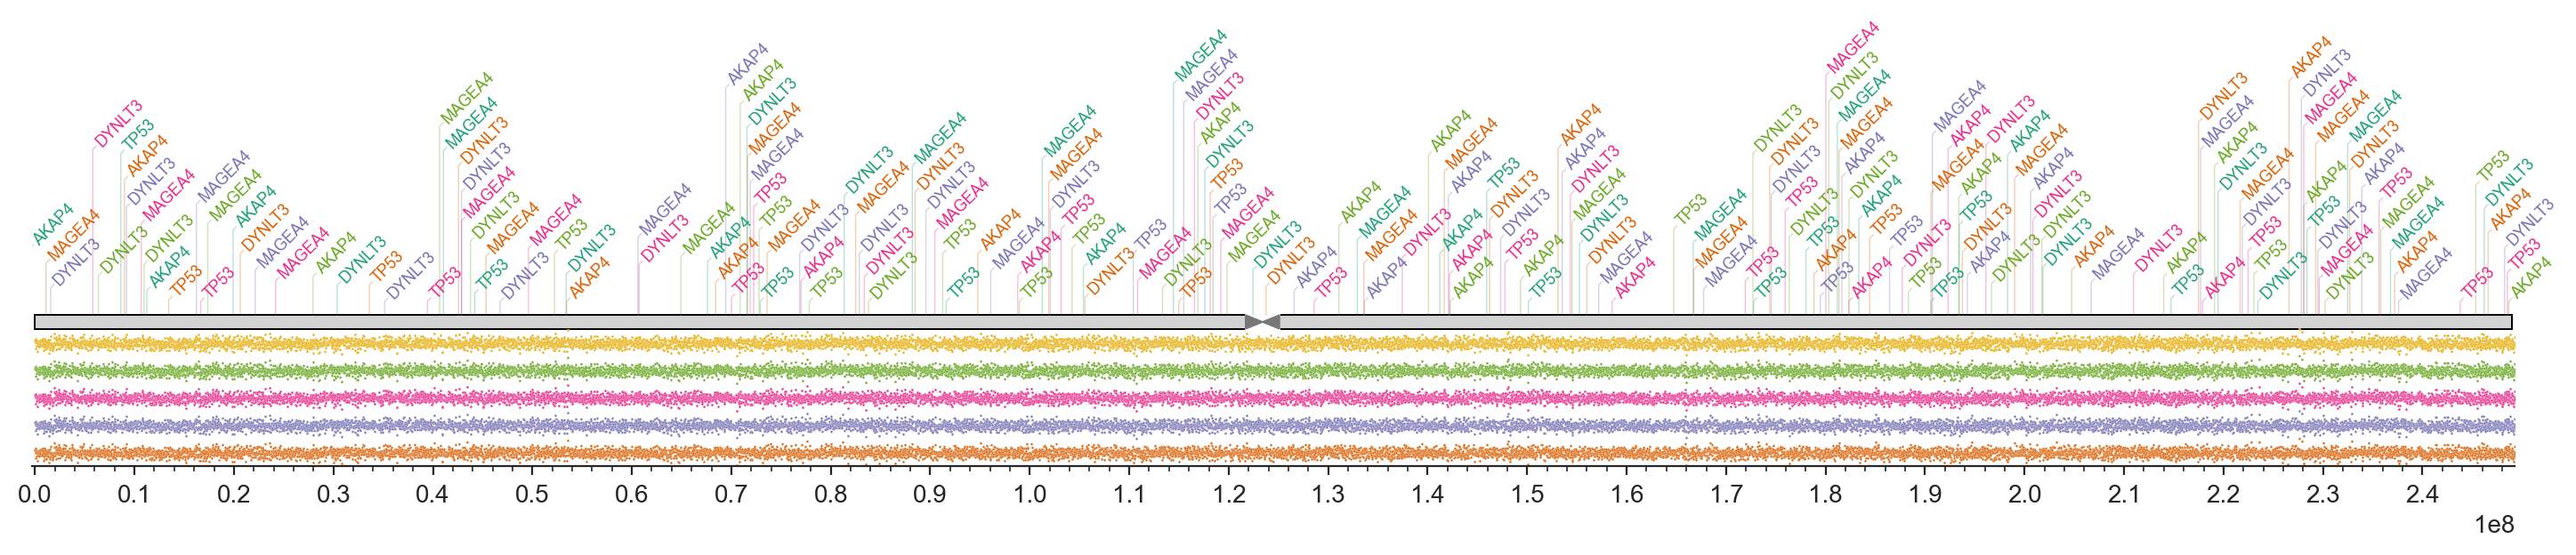

In [55]:
ci = ChromIdeogram('chr1', axes_width_inches=18, axes_height_inches=3, ylim=(0, 3), rel_font_height=0.03) # plots chromosome
ci.draw_chromosomes(base=1, height=0.10, facecolor='lightgray')
ci.add_labels(annot, y0=1.1, y1=1.2)
with sns.color_palette("Dark2"):
    ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.0, 0.2), s=1, c='C1')
    ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.2, 0.4), s=1, c='C2')
    ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.4, 0.6), s=1, c='C3')
    ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.6, 0.8), s=1, c='C4')
    ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.8, 1.0), s=1, c='C5')

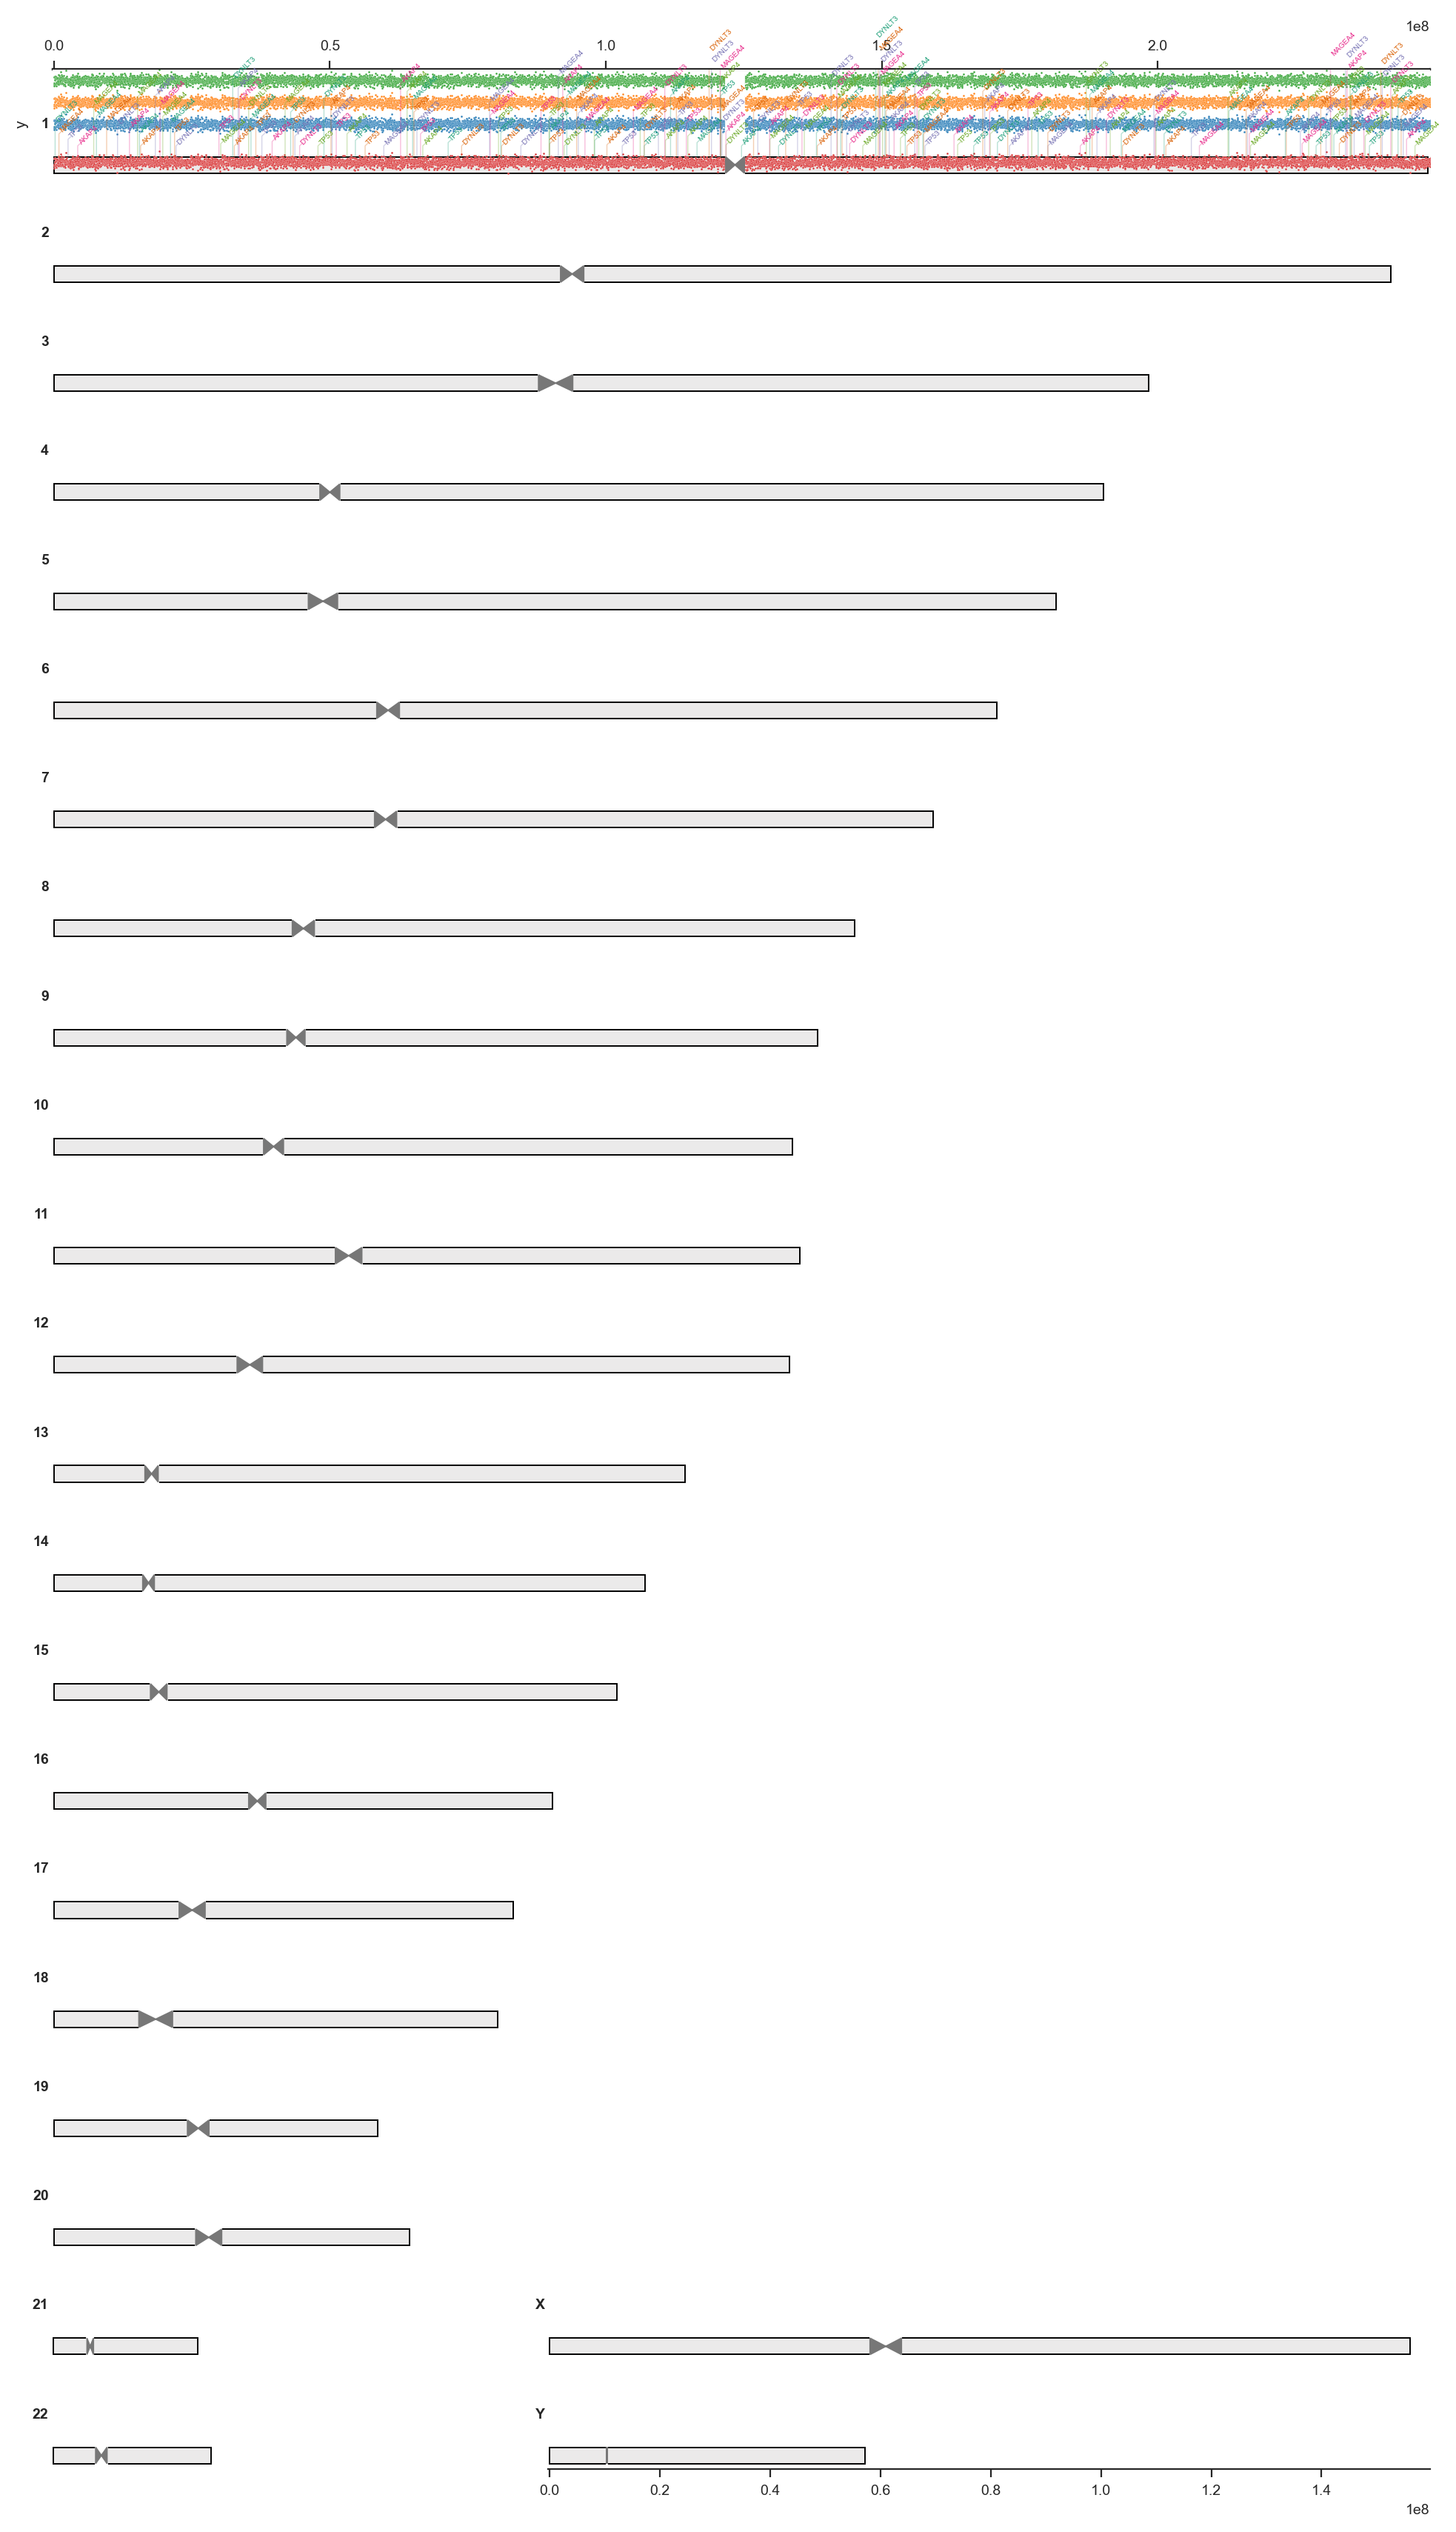

In [50]:
ci = GenomeIdeogram() # plots chromosome
ci.draw_chromosomes(base=0.05, height=0.15)
ci.add_labels(annot, y0=0.2, y1=0.3)
#ci.map(plt.scatter, data=df, x='x', y='y', yaxis=(0.5, 0.7))
ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.4, 0.6), s=1)
ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.6, 0.8), s=1)
ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.8, 1.0), s=1)
ci.map_dataframe(sns.scatterplot, data=df, x='x', y='y', yaxis=(0.05, 0.25), s=1)

In [799]:
# import pandas as pd
# import math
# from matplotlib.artist import Artist


# axes_height = 1e4 # relative to length of chrom one
# max_chrom_size = 1e5
# aspect = axes_height / chrom_size

# fig_width_inches = 8
# axes_height_inches = fig_width * aspect
# fig_height = axes_height_inches * nr_rows

# nr_rows = 11
# fig, axes = plt.subplots(nr_rows, 1, figsize=(fig_width, fig_width*aspect*nr_rows), sharex=True, sharey=True)
# plt.subplots_adjust(hspace=0)
# ax = axes[0]

# xlim = (0, max_chrom_size)
# ylim = (0, 6)
# scaled_y_lim = xlim[0] * aspect, xlim[1] * aspect
# ax.set_xlim(xlim)
# ax.set_ylim(scaled_y_lim)
# plt.yticks([])
# y_unit = -sub(*scaled_y_lim) / -sub(*ylim)

# rel_font_height = 0.1
# font_size = rel_font_height * axes_height_inches / point_size


# def draw_text(x_pos, y_pos, text, font_size, rel_font_height, ax, y_line_bottom=0):
 
#     ax.text(x_pos, y_pos, 'Tester', fontsize=font_size, 
#                 horizontalalignment='left',# weight='bold',
#                 verticalalignment='bottom', 
#                 rotation=45, zorder=3, 
#                 bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'))
#     (_, a), (_, b) = ax.transAxes.transform([(0, 0), (0, rel_font_height / 2)])
#     z = b - a    
#     z = 300
#     z = y_unit/6

#     ax.plot((x_pos, x_pos, x_pos+z),
#             (y_line_bottom, y_pos, y_pos+z), 
#             linewidth=0.5, color='gray')


# def get_polygon(text:str, x_pos:int, y_pos:float, font_size:float, ax:matplotlib.axes.Axes) -> Polygon:

#     y_pos = y_pos * y_unit
#     # x_pos, y_pos = chrom_size/2, 2*y_unit
    
#     # ax.scatter([x_pos], [y_pos], marker='X', color='black')
    
    
#     t = ax.text(x_pos, y_pos, 'Tester', fontsize=font_size, 
#                 horizontalalignment='left',# weight='bold',
#                 verticalalignment='bottom', 
#                 rotation=0, zorder=3, 
#                 bbox=dict(boxstyle='square,pad=0', fc='none', ec='none', alpha=0.4))
#     # t.set_visible(False)
    
#     transf = ax.transData.inverted()
#     bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
#     bbt = bb.transformed(transf)
#     coords = bbt.get_points()
    
#     Artist.remove(t)
    
#     (x0, y0), (x1, y1) = coords
#     coords = np.array([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])
#     # ax.scatter(*coords.T, c='red')
    
#     # ax.scatter(*zip(*coords), transform=ax.transAxes, s=1, color='green', zorder=3)
    
#     x, y = zip(*coords)
#     df = pd.DataFrame(dict(x=x, y=y))
#     df['y'] -= y_pos
#     df['x'] -= x_pos
#     dfx = df['x']*math.cos(math.radians(45))-df['y']*math.sin(math.radians(45))
#     df['y'] = df['x']*math.sin(math.radians(45))+df['y']*math.cos(math.radians(45))
#     df['x'] = dfx
#     df['y'] += y_pos
#     df['x'] += x_pos
    
#     #df['x'] -= df['x'][1] - df['x'][0]
    
#     coords = np.array(list(zip(df.x, df.y)))
    
#     x_pos, y_pos = df['x'][0] - (df['x'][0] - df['x'][1]), df['y'][0]
#     # _ = ax.text(x_pos, y_pos, 'Tester', fontsize=font_size, 
#     #             horizontalalignment='left',# weight='bold',
#     #             verticalalignment='bottom', 
#     #             rotation=45, zorder=3, 
#     #             bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'))
    
#     # ax.scatter(*coords.T, c='blue')
    
#     # ax.plot(*zip(*coords), linewidth=0.2)

#     return x_pos, y_pos, Polygon([Point(x, y) for x, y in zip(df.x, df.y)])


# annot = [(x, 'AKAP4') for x in range(1, int(max_chrom_size), int(max_chrom_size/200))]

# for i, ax in enumerate(axes):
#     annot = [(x, 'AKAP4') for x in range(1, int(max_chrom_size), int(max_chrom_size/(10*(i+1))))]

#     polybuff = []
#     for pos, name in annot:
#         x, y, poly = get_polygon(name, pos, 1, rel_font_height, ax)

#         while any(is_polygons_intersecting(poly, p) for p in polybuff):
#             nudge = 0.1 * y_unit
#             y += nudge
#             poly.nudge_y(nudge)
#         draw_text(x, y, name, font_size, rel_font_height, ax)

#         if len(polybuff) > 5:
#             del polybuff[0]
#         polybuff.append(poly)


[[0.2        0.2       ]
 [0.27711694 0.30281385]]
[[0.51148154 0.92042049]
 [0.55200529 0.73124667]
 [0.6914605  0.9821989 ]
 [0.65093675 1.17137271]]
1.3419913419913418


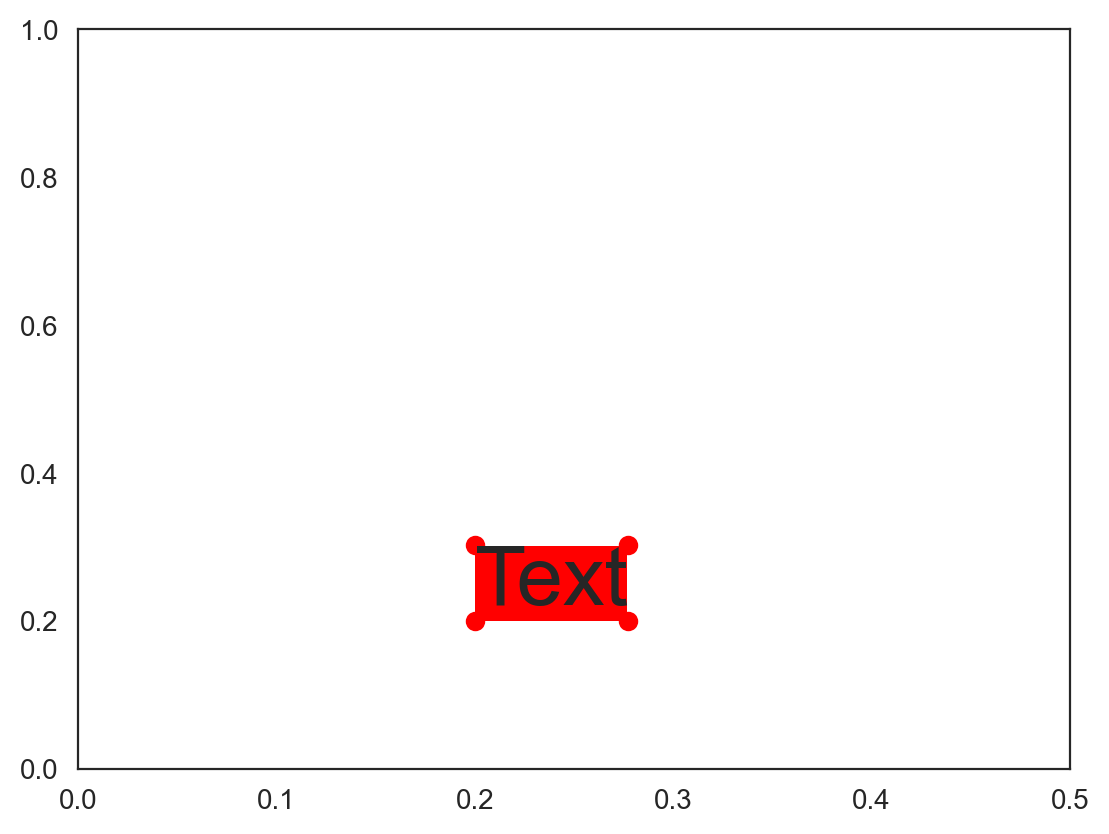

In [559]:
import matplotlib.transforms

from matplotlib.transforms import Bbox
fig, ax = plt.subplots()
plt.xlim(0, 0.5)
plt.ylim(0, 1)

t = ax.text(0.2, 0.2, 'Text', fontsize=30, horizontalalignment='left',# weight='bold',
                         verticalalignment='bottom', rotation=0, zorder=3, bbox=dict(boxstyle='square,pad=0', fc='red', ec='none'))
transf = ax.transData.inverted()
bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
bbt = bb.transformed(transf)
coords = bbt.get_points()
print(coords)
(x0, y0), (x1, y1) = coords
plt_coords = np.array([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])

ax.scatter(*plt_coords.T, c='red')


from operator import sub
aspect_ratio = sub(*ax.get_ylim()) / sub(*ax.get_xlim())

#x0, y0 = coords[0]
# (x0, y0), (x1, y2) = coords
trafo = matplotlib.transforms.Affine2D().rotate_deg_around(x0,y0,45).skew(1, 1.3)#.scale(0.5)

coords = trafo.transform([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])
# coords = trafo.transform([(x0, y0), (x1, y1)])
# coords = trafo.transform(coords)
print(coords)

ax.scatter(*coords.T, zorder=10)

disp_ratio = ax.get_data_ratio()
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
disp_ratio = bbox.width / bbox.height
print(disp_ratio)



(x0, y0), (x0, y1), (x1, y1), (x1, y0) = coords
coords = np.array([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])

ax.scatter(*coords.T)


Polygon([Point(x0, y0), Point(bbt.xmin, b[1]+(b[0]-bbt.xmin)), Point(b[2], b[3]), Point(bbt.xmax, b[3]-(b[0]-bbt.xmin))])


#Bbox.count_overlaps

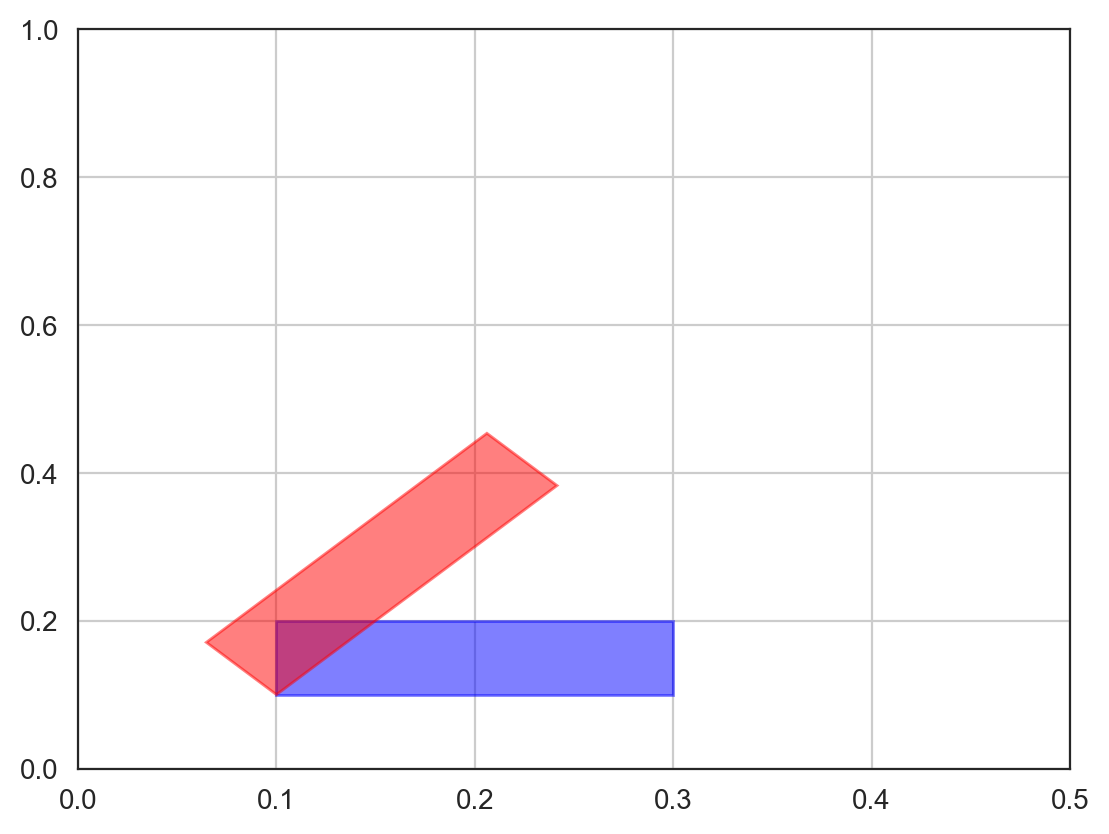

In [560]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig, ax = plt.subplots()

# [[0.25574077 0.46021024]
#  [0.29626452 0.27103643]
#  [0.43571973 0.52198865]
#  [0.39519598 0.71116247]]

# [[0.1        0.1       ]
#  [0.17711694 0.20281385]]
r1 = patches.Rectangle((0.1, 0.1), 0.2, 0.1, color="blue", alpha=0.5)
r2 = patches.Rectangle((0.1, 0.1), 0.2, 0.1, color="red", alpha=0.5)


p = 0.1, 0.1 # rotate around this point

x_lim = (0, 0.5)
y_lim = (0, 1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

x_range = x_lim[1] - x_lim[0]
y_range = y_lim[1] - y_lim[0]
aspect_ratio = y_range / x_range

move_transform = transforms.Affine2D().translate(-p[0], -p[1])
inverse_move_transform = transforms.Affine2D().translate(p[0], p[1])
inverse_scale_transform = transforms.Affine2D().scale(1, 1 / aspect_ratio)
rotate_transform = transforms.Affine2D().rotate_deg(45)
scale_transform = transforms.Affine2D().scale(1, aspect_ratio)

total_transform = move_transform + inverse_scale_transform + rotate_transform + scale_transform + inverse_move_transform + ax.transData

r2.set_transform(total_transform)

ax.add_patch(r1)
ax.add_patch(r2)

# print(ax.transLimits.transform([(0.1, 0.1), (0.1, 0.2), (0.3, 0.2), (0.3, 0.1)]))
# print(total_transform.transform([(0.1, 0.1), (0.1, 0.2), (0.3, 0.2), (0.3, 0.1)]))
# print(r2.get_bbox())
# x0, y0, width, height = r2.get_bbox().bounds()
# print(x0, y0)
# coords = [(x0, y0), 
#           (x0 - sqrt(height**2 / 2), y0 + sqrt(height**2 / 2)), 
#           (x0 - sqrt(height**2 / 2) + sqrt(width**2 / 2), y0 + sqrt(height**2 / 2)) +  + sqrt(width**2 / 2), 
#           (x0 + sqrt(width**2 / 2), y0 + sqrt(width**2 / 2))]
# plt.scatter(*zip(*coords))

# coords = ((0.1, 0.1), (0.1, 0.2), (0.3, 0.2), (0.3, 0.1))
# plt.scatter(*zip(*coords))
# coords = total_transform.transform(coords)
# print(coords)
# plt.scatter(*zip(*coords))

plt.grid(True)
plt.show()

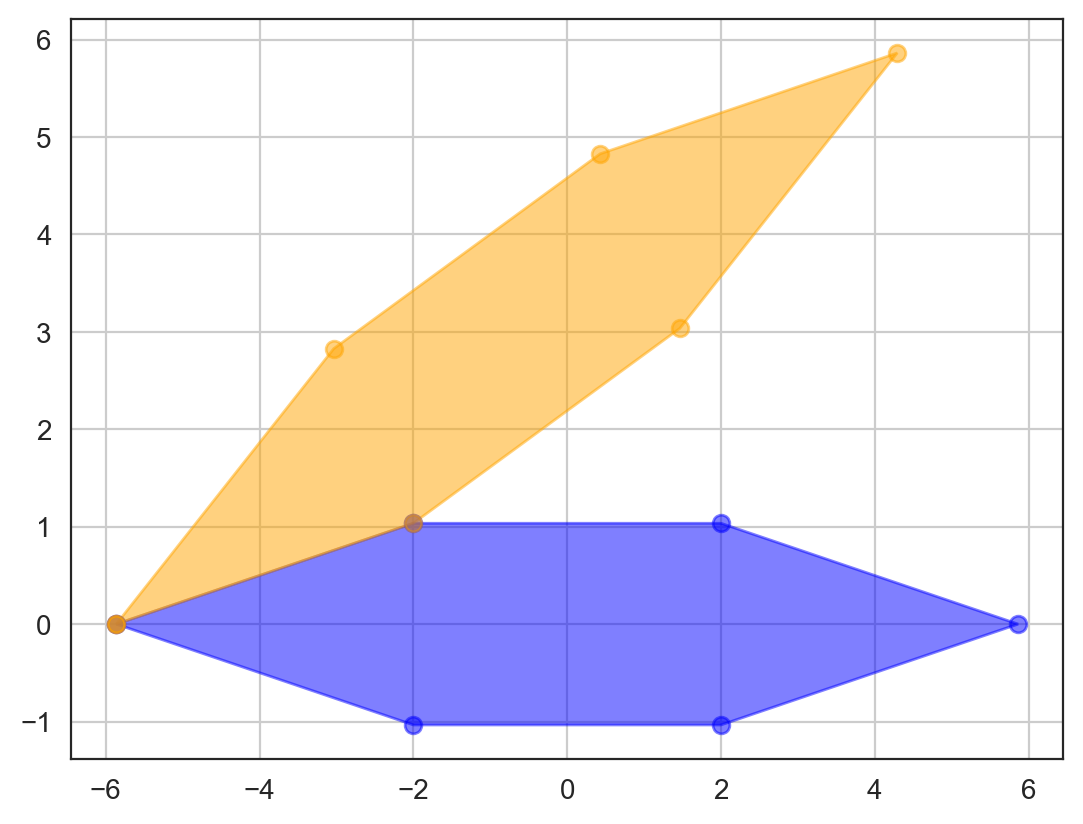

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from math import *

#some helper values
p=4
theta=pi/6
x1 = p*cos(theta/2)
y1 = p*sin(theta/2)
vertices =[(-x1-p/2,0), (-p/2, y1), (p/2, y1), (x1+p/2, 0), (p/2, -y1), (-p/2, -y1)] 
midPoint = [3,4]
endPoint = (-x1-p/2,0)

#set up the plot
fig = plt.figure()
ax = fig.add_subplot(111)

#function to rotate and translate the standard shape to a new position
def plot_polygon(vertices, midPoint, theta, color):
    polygon = patches.Polygon(vertices, color=color, alpha=0.50) 
    r = mpl.transforms.Affine2D().rotate_around(midPoint[0],midPoint[1], theta)
    # t = mpl.transforms.Affine2D().translate(midPoint[0],midPoint[1])
    tra = r + ax.transData
    # r = mpl.transforms.Affine2D().rotate(theta)
    # t = mpl.transforms.Affine2D().translate(midPoint[0],midPoint[1])
    # tra = r + t + ax.transData
    polygon.set_transform(tra)
    ax.add_patch(polygon)

    return r.transform(polygon.xy)

p = plot_polygon(vertices, endPoint, 0, "blue")
#plot_polygon(vertices, midPoint, theta, "blue")
p_ = plot_polygon(vertices, endPoint, theta, "orange")

# print(p.get_xy())
# print(p_.get_xy())
# print(p.get_transform().transform(p.xy))
# print(p_.get_transform().transform(p_.xy))
#The correct answer is: tra.transform(poly.xy)


plt.scatter(*zip(*p), color='blue', alpha=0.5)
plt.scatter(*zip(*p_), color='orange', alpha=0.5)

# plt.xlim(-10, 10)
# plt.ylim(-10, 10)

plt.grid(True)

plt.show()

In [596]:
chrom_size = 12e5
ylim = (0, 3)
xlim = (0, chrom_size)
data_height = (ylim[1] - ylim[0])
data_width = (xlim[1] - xlim[0])
aspect = data_height / data_width
aspect
# data_width * aspect
# ylim = ylim * sub(*ylim) / sub(*xlim)
# chrom_size * sub(*ylim) / sub(*xlim)

2.5e-06

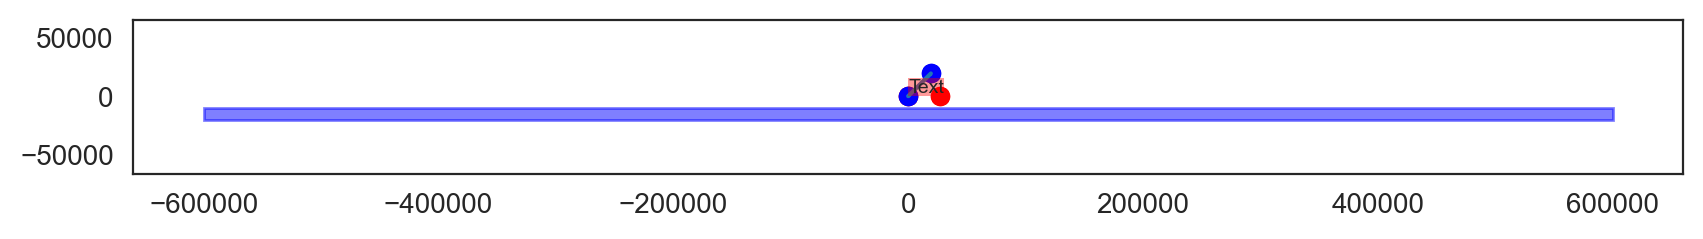

In [586]:
import pandas as pd
import math
from operator import sub
coords = [(0, 0), (0, 1e4), (3e4, 1e4), (3e4, 0)]


chrom_size = 12e5
ylim = np.array([0, 3])
xlim = np.array([0, chrom_size])
ylim = sub()sub(ylim) / sub(xlim) *

# fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 1), sharex=True)
fig, ax = plt.subplots(1, 1, figsize=(10, 1), sharex=True)
ax.set_xlim(-6e5, 6e5)
ax.set_ylim(-6e4, 6e4)
ax.axis('equal')

# t = ax.text(0, 0, 'Text', fontsize=7, horizontalalignment='left',# weight='bold',
#                          verticalalignment='bottom', rotation=0, zorder=3, bbox=dict(boxstyle='square,pad=0', fc='red', ec='none', alpha=0.4))
# box = t.get_bbox_patch()
# fig.canvas.draw()
# ax.axis('equal')
# ax.set_xlim(-6e5, 6e5)
# ax.set_ylim(-4e5, 4e5)
# # coords = ax.transData.inverted().transform(box.get_window_extent())
# #coords = ax.transAxes.transform(coords)

# # print(coords)
# # print(ax.transLimits.transform(coords))

t = ax.text(0, 0, 'Text', fontsize=7, horizontalalignment='left',# weight='bold',
                         verticalalignment='bottom', rotation=0, zorder=3, bbox=dict(boxstyle='square,pad=0', fc='red', ec='none', alpha=0.4))
transf = ax.transData.inverted()
bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
bbt = bb.transformed(transf)
coords = bbt.get_points()

(x0, y0), (x1, y1) = coords
coords = np.array([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])
ax.scatter(*coords.T, c='red')

# ax.scatter(*zip(*coords), transform=ax.transAxes, s=1, color='green', zorder=3)

x, y = zip(*coords)
df = pd.DataFrame(dict(x=x, y=y))
dfx = df['x']*math.cos(math.radians(45))-df['y']*math.sin(math.radians(45))
df['y'] = df['x']*math.sin(math.radians(45))+df['y']*math.cos(math.radians(45))
df['x'] = dfx
coords = np.array(list(zip(df.x, df.y)))

ax.scatter(*coords.T, c='blue')

ax.plot(*zip(*coords))

# ax.axis('equal')
# ax.set_xlim(-6e5, 6e5)
# ax.set_ylim(-4e5, 4e5)

rect = patches.Rectangle((-6e5, -2e4), 12e5, 1e4, color="blue", alpha=0.5)
ax.add_patch(rect) ;

[[0.2        0.2       ]
 [1.97368952 0.30281385]]


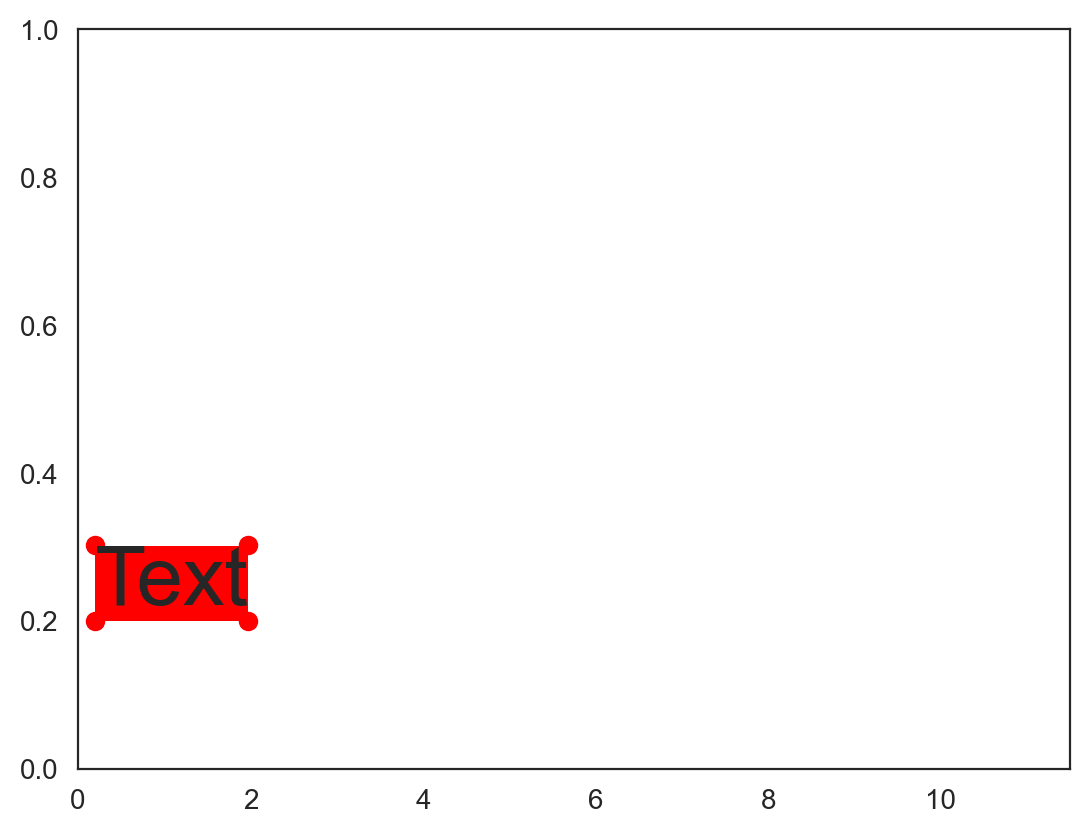

In [566]:
fig, ax = plt.subplots()
plt.xlim(0, 0.5)
plt.ylim(0, 1)
t = ax.text(0.2, 0.2, 'Text', fontsize=30, horizontalalignment='left',# weight='bold',
                         verticalalignment='bottom', rotation=0, zorder=3, bbox=dict(boxstyle='square,pad=0', fc='red', ec='none'))


transf = ax.transData.inverted()
bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
bbt = bb.transformed(transf)
coords = bbt.get_points()
print(coords)
(x0, y0), (x1, y1) = coords
plt_coords = np.array([(x0, y0), (x0, y1), (x1, y1), (x1, y0)])

ax.scatter(*plt_coords.T, c='red')



[[0.1        0.1       ]
 [0.25716788 0.0862437 ]]
[[0.1        0.23      ]
 [0.25716788 0.2162437 ]]


AttributeError: 'NoneType' object has no attribute 'get_points'

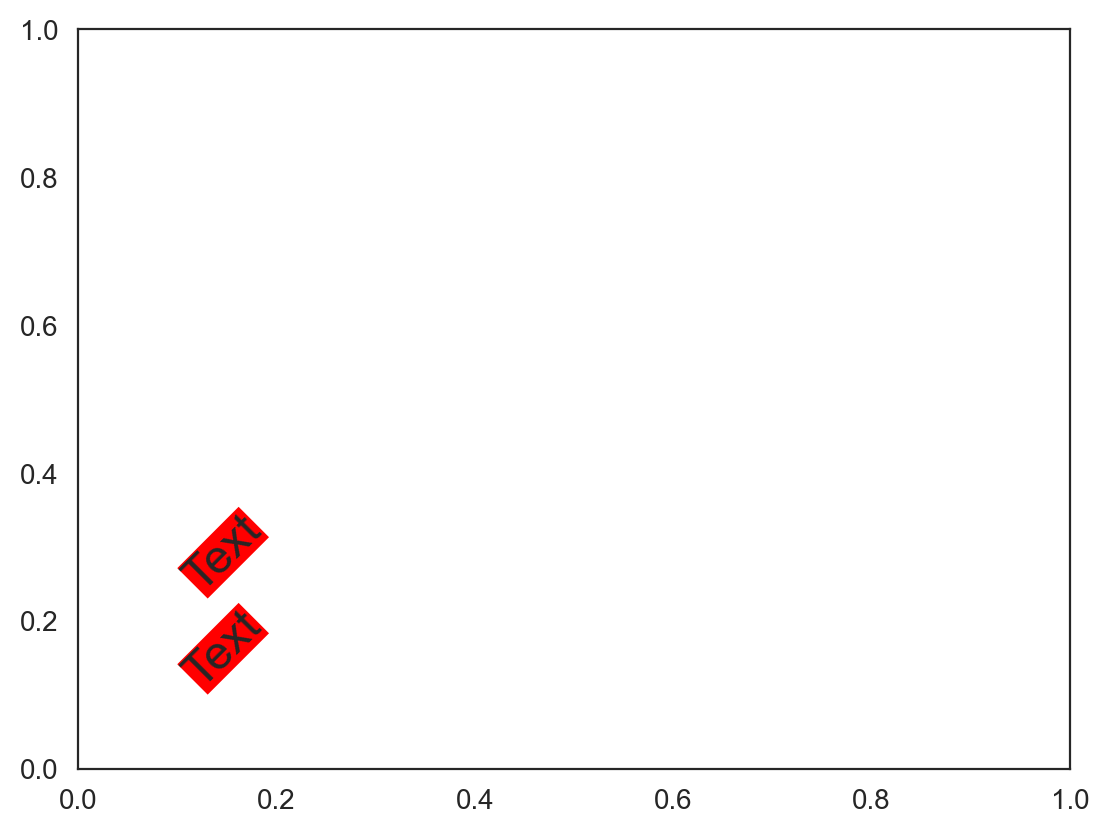

In [391]:
import matplotlib.transforms

from matplotlib.transforms import Bbox
fig, ax = plt.subplots()

def get_polygon(t):

    transf = ax.transData.inverted()
    bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
    bbt = bb.transformed(transf)
    coords = bbt.get_points()

    x0, y0 = coords[0]
    trafo = matplotlib.transforms.Affine2D().rotate_around(x0,y0,-)
    print(trafo.transform(coords))

# bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
    # coords = bb.get_points()
    # print(coords)
    # x0, y0 = coords[0]
    # print(x0, y0)
    # trafo = matplotlib.transforms.Affine2D().rotate_around(x0,y0,45)

    # coords = bb.get_points()
    # print(coords)
    # print(trafo.transform(coords))

    # transf = ax.transData.inverted()
    # bb = t.get_window_extent(renderer = fig.canvas.get_renderer())
    # bbt = bb.transformed(transf)
    # # return bbt
    # b = bbt.bounds
    # # print(dir(bbt), bbt.rotated(0.785398).corners())

    # return Polygon([Point(b[0], b[1]), Point(bbt.xmin, b[1]+(b[0]-bbt.xmin)), Point(b[2], b[3]), Point(bbt.xmax, b[3]-(b[0]-bbt.xmin))])
    # # return Polygon([Point(bbt.xmin, bbt.ymin), Point(bbt.xmin, bbt.ymin), Point(bbt.xmin, bbt.ymin), Point(bbt.xmin, bbt.ymin)])

t = ax.text(0.1, 0.1, 'Text', fontsize=17, horizontalalignment='left',# weight='bold',
                         verticalalignment='bottom', rotation=45, zorder=3, bbox=dict(boxstyle='square,pad=0', fc='red', ec='none'))
a = get_polygon(t)
#xs, ys = zip(*[(p.x, p.y) for p in a.get_points()])
# print(xs, ys)

t = ax.text(0.1, 0.23, 'Text', fontsize=17, horizontalalignment='left',# weight='bold',
                         verticalalignment='bottom', rotation=45, zorder=3, bbox=dict(boxstyle='square,pad=0', fc='red', ec='none'))
#ax.plot(xs,ys) 
b = get_polygon(t)
is_polygons_intersecting(a, b)

#print(Bbox.intersection(a, b))

Bbox(x0=72266463.49999999, y0=2.299999999999999, x1=78844788.63027559, y1=4.219218090860526)
Bbox(x0=38185129.999999985, y0=2.299999999999999, x1=43874492.27483292, y1=3.959864294798294)
Bbox(x0=2916660.500000015, y0=2.299999999999999, x1=8677139.803268358, y1=3.9806125984832725)
Bbox(x0=1428450.5, y0=2.299999999999999, x1=8042334.144493267, y1=4.229592242703012)
Bbox(x0=44533249.000000015, y0=2.299999999999999, x1=52320563.613677576, y1=4.571939253505164)
Bbox(x0=6908011.500000015, y0=2.299999999999999, x1=12632932.289050654, y1=3.9702384466407814)
Bbox(x0=53064702.000000015, y0=2.299999999999999, x1=60531989.985718235, y1=4.478571886922758)
Bbox(x0=119654546.99999999, y0=2.299999999999999, x1=127619654.1847661, y1=4.623810012717609)
Bbox(x0=48684013.500000015, y0=2.299999999999999, x1=53626646.976261124, y1=3.7420071061060156)
Bbox(x0=15840368.500000015, y0=2.299999999999999, x1=22169784.03075163, y1=4.146599027963099)
Bbox(x0=16742475.999999985, y0=2.299999999999999, x1=23107450.044

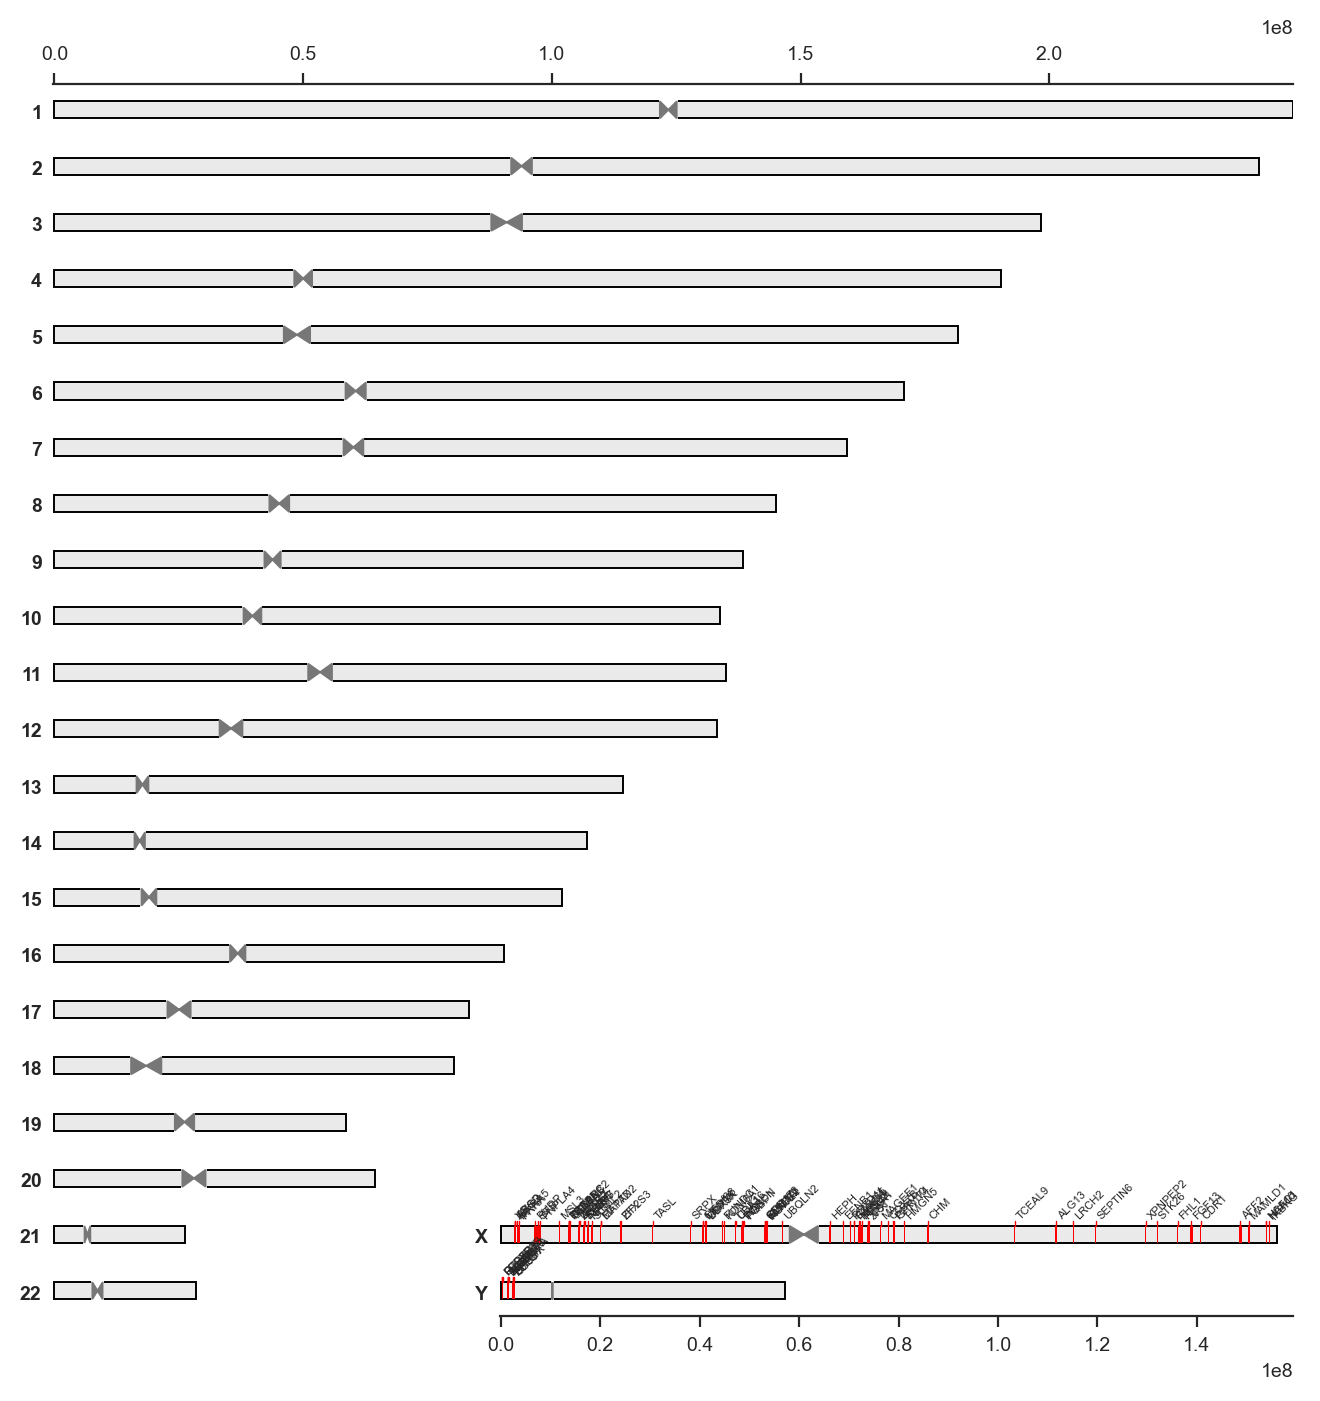

In [24]:
import importlib
import geneinfo
importlib.reload(geneinfo)

gi.chrom_ideogram(annotation, figsize=(8, 8))